In [1]:
# This implementation is based on concepts introduced in "ADBench: Anomaly Detection Benchmark" by Songqiao Han et al.
# Presented at Neural Information Processing Systems (NeurIPS) 2022.
# Reference: @inproceedings{han2022adbench,
#   title={ADBench: Anomaly Detection Benchmark},
#   author={Songqiao Han and Xiyang Hu and Hailiang Huang and Mingqi Jiang and Yue Zhao},
#   booktitle={Neural Information Processing Systems (NeurIPS)},
#   year={2022}
# }
# This implementation uses code from "ADBench" by Mickey (Minqi), available under the BSD 2-Clause License.
# Copyright (c) 2022, Mickey (Minqi).
# License details and conditions are provided in the LICENSE.txt file included in the distribution or accessible at [https://github.com/yzhao062/ADBench/tree/main?tab=License-1-ov-file].

In [1]:
from __future__ import division
from __future__ import print_function

import os
import sys
from time import time
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA

from pyod.utils.utility import standardizer
from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score

# RATIO = 0.05

In [2]:
# Cell 1: Outlier Fraction 0.05

import os
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define data file and read X and y
random_state = np.random.RandomState(0)
predictions_dict = {}
decision_scores_dict = {}

# Load dataset
mat = loadmat(os.path.join('data', 'pain_bowels.mat'))
X = mat['X']
y = mat['y'].ravel()

# Set the outlier fraction for this cell
outliers_fraction = 0.05
outliers_percentage = round(outliers_fraction * 100, ndigits=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random_state)

# Standardizing data for processing
X_train_norm = standardizer(X_train)
X_test_norm = standardizer(X_test)

# Define the outlier detection classifiers
classifiers = {
    'ABOD': ABOD(contamination=outliers_fraction),
    'CBLOF': CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=random_state),
    'FeatureBagging': FeatureBagging(contamination=outliers_fraction, random_state=random_state),
    'HBOS': HBOS(contamination=outliers_fraction),
    'IForest': IForest(contamination=outliers_fraction, random_state=random_state),
    'KNN': KNN(contamination=outliers_fraction),
    'LOF': LOF(contamination=outliers_fraction),
    'MCD': MCD(contamination=outliers_fraction, random_state=random_state),
    'OCSVM': OCSVM(contamination=outliers_fraction),
    'PCA': PCA(contamination=outliers_fraction, random_state=random_state),
}

# Run the models and collect predictions and decision scores
for clf_name, clf in classifiers.items():
    clf.fit(X_train_norm)
    test_scores = clf.decision_function(X_test_norm)  # Use decision function scores
    y_pred = clf.predict(X_test_norm)

    # Store the continuous decision scores and hard predictions
    decision_scores_dict[f'{clf_name}'] = test_scores
    predictions_dict[f'{clf_name}'] = y_pred

# Save hard predictions and decision scores for later use
pred_df = pd.DataFrame(predictions_dict)
pred_df.to_csv('predictions_0.05.csv', index=False)
decision_scores_df = pd.DataFrame(decision_scores_dict)
decision_scores_df.to_csv('decision_scores_0.05.csv', index=False)
y_te = pd.DataFrame(y_test)
y_te.to_csv('y_test_0.05.csv', index=False)

In [3]:
# Check unique classes in y
unique_classes = np.unique(y)
print("Unique classes in y:", unique_classes)
# Check the frequency (count) of each class in y
class_counts = np.bincount(y.astype(int))  # Ensure y is of integer type for bincount
for i, count in enumerate(class_counts):
    print(f"Class {i}: {count} samples")

Unique classes in y: [0 1]
Class 0: 3840 samples
Class 1: 77 samples


# RATIO=0.1

In [4]:
# Cell 2: Outlier Fraction 0.1#

# Set the outlier fraction for this cell
outliers_fraction = 0.1
outliers_percentage = round(outliers_fraction * 100, ndigits=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random_state)

# Standardizing data for processing
X_train_norm = standardizer(X_train)
X_test_norm = standardizer(X_test)

# Define the outlier detection classifiers
classifiers = {
    'ABOD': ABOD(contamination=outliers_fraction),
    'CBLOF': CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=random_state),
    'FeatureBagging': FeatureBagging(contamination=outliers_fraction, random_state=random_state),
    'HBOS': HBOS(contamination=outliers_fraction),
    'IForest': IForest(contamination=outliers_fraction, random_state=random_state),
    'KNN': KNN(contamination=outliers_fraction),
    'LOF': LOF(contamination=outliers_fraction),
    'MCD': MCD(contamination=outliers_fraction, random_state=random_state),
    'OCSVM': OCSVM(contamination=outliers_fraction),
    'PCA': PCA(contamination=outliers_fraction, random_state=random_state),
}

# Run the models and collect predictions and decision scores
for clf_name, clf in classifiers.items():
    clf.fit(X_train_norm)
    test_scores = clf.decision_function(X_test_norm)  # Use decision function scores
    y_pred = clf.predict(X_test_norm)

    # Store the continuous decision scores and hard predictions
    decision_scores_dict[f'{clf_name}'] = test_scores
    predictions_dict[f'{clf_name}'] = y_pred

# Save hard predictions and decision scores for later use
pred_df = pd.DataFrame(predictions_dict)
pred_df.to_csv('predictions_0.1.csv', index=False)
decision_scores_df = pd.DataFrame(decision_scores_dict)
decision_scores_df.to_csv('decision_scores_0.1.csv', index=False)
y_te = pd.DataFrame(y_test)
y_te.to_csv('y_test_0.1.csv', index=False)


# RATIO = 0.2

In [5]:
# Cell 3: Outlier Fraction 0.20

# Set the outlier fraction for this cell
outliers_fraction = 0.2
outliers_percentage = round(outliers_fraction * 100, ndigits=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random_state)

# Standardizing data for processing
X_train_norm = standardizer(X_train)
X_test_norm = standardizer(X_test)

# Define the outlier detection classifiers
classifiers = {
    'ABOD': ABOD(contamination=outliers_fraction),
    'CBLOF': CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=random_state),
    'FeatureBagging': FeatureBagging(contamination=outliers_fraction, random_state=random_state),
    'HBOS': HBOS(contamination=outliers_fraction),
    'IForest': IForest(contamination=outliers_fraction, random_state=random_state),
    'KNN': KNN(contamination=outliers_fraction),
    'LOF': LOF(contamination=outliers_fraction),
    'MCD': MCD(contamination=outliers_fraction, random_state=random_state),
    'OCSVM': OCSVM(contamination=outliers_fraction),
    'PCA': PCA(contamination=outliers_fraction, random_state=random_state),
}

# Run the models and collect predictions and decision scores
for clf_name, clf in classifiers.items():
    clf.fit(X_train_norm)
    test_scores = clf.decision_function(X_test_norm)  # Use decision function scores
    y_pred = clf.predict(X_test_norm)

    # Store the continuous decision scores and hard predictions
    decision_scores_dict[f'{clf_name}'] = test_scores
    predictions_dict[f'{clf_name}'] = y_pred

# Save hard predictions and decision scores for later use
pred_df = pd.DataFrame(predictions_dict)
pred_df.to_csv('predictions_0.2.csv', index=False)
decision_scores_df = pd.DataFrame(decision_scores_dict)
decision_scores_df.to_csv('decision_scores_0.2.csv', index=False)
y_te = pd.DataFrame(y_test)
y_te.to_csv('y_test_0.2.csv', index=False)

# RATIO=0.3

In [6]:
# Cell 4: Outlier Fraction 0.30

# Set the outlier fraction for this cell
outliers_fraction = 0.3
outliers_percentage = round(outliers_fraction * 100, ndigits=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random_state)

# Standardizing data for processing
X_train_norm = standardizer(X_train)
X_test_norm = standardizer(X_test)

# Define the outlier detection classifiers
classifiers = {
    'ABOD': ABOD(contamination=outliers_fraction),
    'CBLOF': CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=random_state),
    'FeatureBagging': FeatureBagging(contamination=outliers_fraction, random_state=random_state),
    'HBOS': HBOS(contamination=outliers_fraction),
    'IForest': IForest(contamination=outliers_fraction, random_state=random_state),
    'KNN': KNN(contamination=outliers_fraction),
    'LOF': LOF(contamination=outliers_fraction),
    'MCD': MCD(contamination=outliers_fraction, random_state=random_state),
    'OCSVM': OCSVM(contamination=outliers_fraction),
    'PCA': PCA(contamination=outliers_fraction, random_state=random_state),
}

# Run the models and collect predictions and decision scores
for clf_name, clf in classifiers.items():
    clf.fit(X_train_norm)
    test_scores = clf.decision_function(X_test_norm)  # Use decision function scores
    y_pred = clf.predict(X_test_norm)

    # Store the continuous decision scores and hard predictions
    decision_scores_dict[f'{clf_name}'] = test_scores
    predictions_dict[f'{clf_name}'] = y_pred

# Save hard predictions and decision scores for later use
pred_df = pd.DataFrame(predictions_dict)
pred_df.to_csv('predictions_0.3.csv', index=False)
decision_scores_df = pd.DataFrame(decision_scores_dict)
decision_scores_df.to_csv('decision_scores_0.3.csv', index=False)
y_te = pd.DataFrame(y_test)
y_te.to_csv('y_test_0.3.csv', index=False)


# RATIO = 0.4

In [7]:
# Cell 5: Outlier Fraction 0.4

# Set the outlier fraction for this cell
outliers_fraction = 0.4
outliers_percentage = round(outliers_fraction * 100, ndigits=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random_state)

# Standardizing data for processing
X_train_norm = standardizer(X_train)
X_test_norm = standardizer(X_test)

# Define the outlier detection classifiers
classifiers = {
    'ABOD': ABOD(contamination=outliers_fraction),
    'CBLOF': CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=random_state),
    'FeatureBagging': FeatureBagging(contamination=outliers_fraction, random_state=random_state),
    'HBOS': HBOS(contamination=outliers_fraction),
    'IForest': IForest(contamination=outliers_fraction, random_state=random_state),
    'KNN': KNN(contamination=outliers_fraction),
    'LOF': LOF(contamination=outliers_fraction),
    'MCD': MCD(contamination=outliers_fraction, random_state=random_state),
    'OCSVM': OCSVM(contamination=outliers_fraction),
    'PCA': PCA(contamination=outliers_fraction, random_state=random_state),
}

# Run the models and collect predictions and decision scores
for clf_name, clf in classifiers.items():
    clf.fit(X_train_norm)
    test_scores = clf.decision_function(X_test_norm)  # Use decision function scores
    y_pred = clf.predict(X_test_norm)

    # Store the continuous decision scores and hard predictions
    decision_scores_dict[f'{clf_name}'] = test_scores
    predictions_dict[f'{clf_name}'] = y_pred

# Save hard predictions and decision scores for later use
pred_df = pd.DataFrame(predictions_dict)
pred_df.to_csv('predictions_0.4.csv', index=False)
decision_scores_df = pd.DataFrame(decision_scores_dict)
decision_scores_df.to_csv('decision_scores_0.4.csv', index=False)
y_te = pd.DataFrame(y_test)
y_te.to_csv('y_test_0.4.csv', index=False)


# RATIO=0.5

In [8]:
# Cell 6: Outlier Fraction 0.5

# Set the outlier fraction for this cell
outliers_fraction = 0.5
outliers_percentage = round(outliers_fraction * 100, ndigits=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random_state)

# Standardizing data for processing
X_train_norm = standardizer(X_train)
X_test_norm = standardizer(X_test)

# Define the outlier detection classifiers
classifiers = {
    'ABOD': ABOD(contamination=outliers_fraction),
    'CBLOF': CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=random_state),
    'FeatureBagging': FeatureBagging(contamination=outliers_fraction, random_state=random_state),
    'HBOS': HBOS(contamination=outliers_fraction),
    'IForest': IForest(contamination=outliers_fraction, random_state=random_state),
    'KNN': KNN(contamination=outliers_fraction),
    'LOF': LOF(contamination=outliers_fraction),
    'MCD': MCD(contamination=outliers_fraction, random_state=random_state),
    'OCSVM': OCSVM(contamination=outliers_fraction),
    'PCA': PCA(contamination=outliers_fraction, random_state=random_state),
}

# Run the models and collect predictions and decision scores
for clf_name, clf in classifiers.items():
    clf.fit(X_train_norm)
    test_scores = clf.decision_function(X_test_norm)  # Use decision function scores
    y_pred = clf.predict(X_test_norm)

    # Store the continuous decision scores and hard predictions
    decision_scores_dict[f'{clf_name}'] = test_scores
    predictions_dict[f'{clf_name}'] = y_pred

# Save hard predictions and decision scores for later use
pred_df = pd.DataFrame(predictions_dict)
pred_df.to_csv('predictions_0.5.csv', index=False)
decision_scores_df = pd.DataFrame(decision_scores_dict)
decision_scores_df.to_csv('decision_scores_0.5.csv', index=False)
y_te = pd.DataFrame(y_test)
y_te.to_csv('y_test_0.5.csv', index=False)


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_score, recall_score, f1_score
)

def plot_metrics(pred_file, score_file, y_test_file, outlier_fraction):
    predictions_df = pd.read_csv(pred_file)
    decision_scores_df = pd.read_csv(score_file)
    y_test = pd.read_csv(y_test_file).to_numpy().ravel()
    
    # Iterate through each model's decision scores for ROC curve and confusion matrix
    for model_name in predictions_df.columns:
        y_pred = predictions_df[model_name].to_numpy()
        test_scores = decision_scores_df[model_name].to_numpy()

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        plt.figure(figsize=(5, 4))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=np.unique(y_test))
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()
        
def print_precision_recall_table(pred_file, test_scores_file, y_test_file):
    predictions_df = pd.read_csv(pred_file)
    test_scores_df = pd.read_csv(test_scores_file)
    y_test = pd.read_csv(y_test_file).to_numpy().ravel()
    
    # Initialize precision, recall, F1, ROC AUC, and PR AUC lists for each model
    precision_list = []
    recall_list = []
    f1_list = []
    roc_auc_list = []
    pr_auc_list = []
    
    # Iterate through each model's predictions for precision, recall, F1, ROC AUC, and PR AUC
    for model_name in predictions_df.columns:
        y_pred = predictions_df[model_name].to_numpy()
        test_scores = test_scores_df[model_name].to_numpy()  # Load the decision scores

        # Precision, Recall, F1 Score
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')
        
        # ROC AUC (using decision scores)
        fpr, tpr, _ = roc_curve(y_test, test_scores)
        roc_auc = auc(fpr, tpr)

        # PR AUC (using decision scores)
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, test_scores)
        pr_auc = auc(recall_curve, precision_curve)
        
        # Append the scores to respective lists
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        roc_auc_list.append(roc_auc)
        pr_auc_list.append(pr_auc)

    # Create a DataFrame for the precision, recall, F1, ROC AUC, and PR AUC table
    precision_recall_df = pd.DataFrame(
        [precision_list, recall_list, f1_list, roc_auc_list, pr_auc_list],
        columns=predictions_df.columns,
        index=['Precision', 'Recall', 'F1 Score', 'ROC AUC', 'PR AUC']
    )

    # Print the precision, recall, F1, ROC AUC, and PR AUC score table
    print("\nPrecision, Recall, F1, ROC AUC, and PR AUC Score Table:")
    print(precision_recall_df)


# Call the functions with different outlier fractions
outlier_fraction_list = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

for fraction in outlier_fraction_list:
    print(f"\nResults for Outlier Fraction {fraction}:")
    pred_file = f'predictions_{fraction}.csv'
    score_file = f'decision_scores_{fraction}.csv'
    y_test_file = f'y_test_{fraction}.csv'
    
    # Print precision, recall, F1, ROC AUC, and PR AUC table
    print_precision_recall_table(pred_file, score_file, y_test_file)



Results for Outlier Fraction 0.05:

Precision, Recall, F1, ROC AUC, and PR AUC Score Table:
               ABOD     CBLOF  FeatureBagging      HBOS   IForest       KNN  \
Precision  0.000000  0.242857        0.000000  0.112676  0.206897  0.148649   
Recall     0.000000  0.607143        0.000000  0.571429  0.642857  0.392857   
F1 Score   0.000000  0.346939        0.000000  0.188235  0.313043  0.215686   
ROC AUC    0.892579  0.931519        0.502738  0.868955  0.952868  0.927666   
PR AUC     0.101084  0.264554        0.016497  0.222655  0.393059  0.135229   

                LOF       MCD     OCSVM       PCA  
Precision  0.012346  0.213333  0.253333  0.301587  
Recall     0.035714  0.571429  0.678571  0.678571  
F1 Score   0.018349  0.310680  0.368932  0.417582  
ROC AUC    0.577184  0.930544  0.958113  0.965260  
PR AUC     0.020621  0.206149  0.274871  0.359097  

Results for Outlier Fraction 0.1:

Precision, Recall, F1, ROC AUC, and PR AUC Score Table:
               ABOD     CBLO

<Figure size 500x400 with 0 Axes>

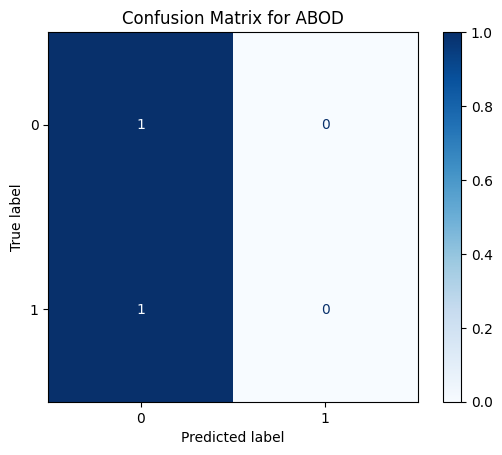

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

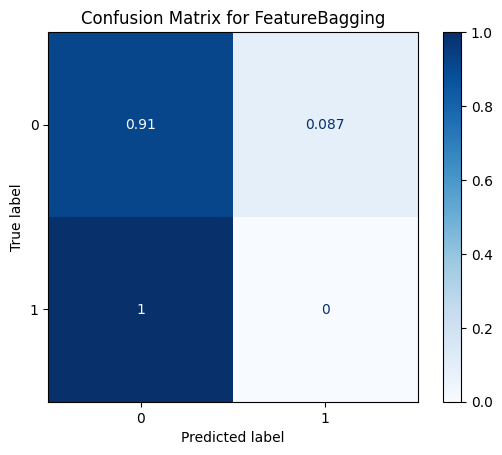

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

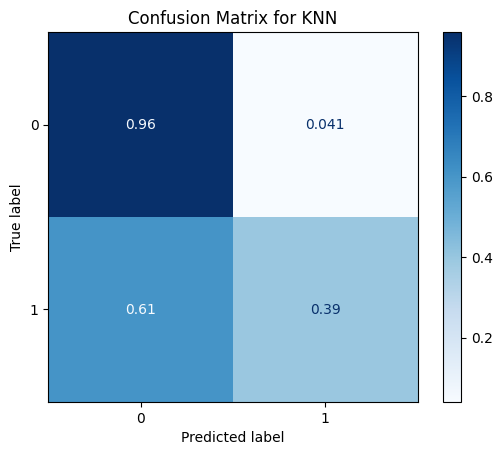

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

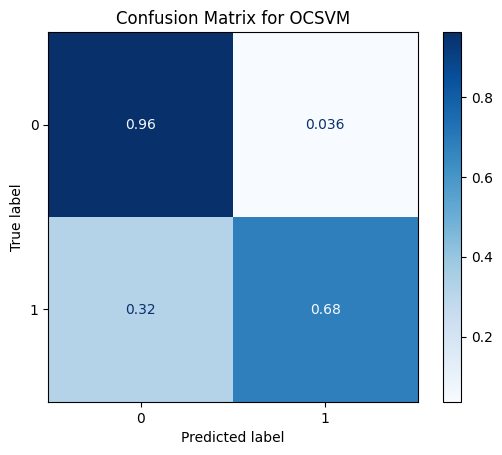

<Figure size 500x400 with 0 Axes>

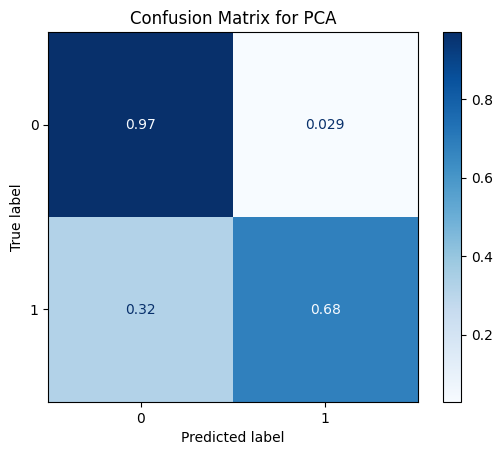

In [10]:
plot_metrics('predictions_0.05.csv', 'decision_scores_0.05.csv', 'y_test_0.05.csv', 0.05)

<Figure size 500x400 with 0 Axes>

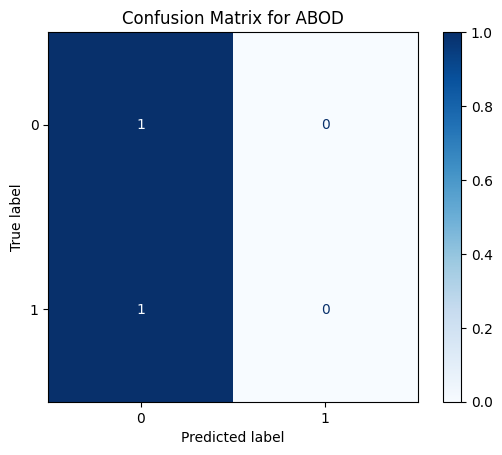

<Figure size 500x400 with 0 Axes>

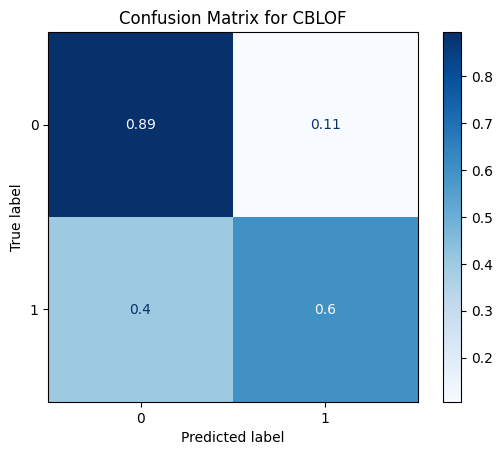

<Figure size 500x400 with 0 Axes>

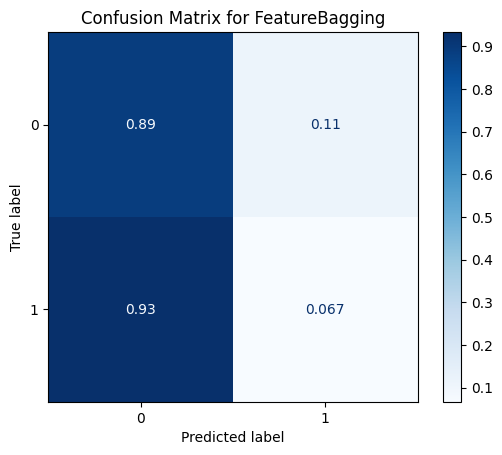

<Figure size 500x400 with 0 Axes>

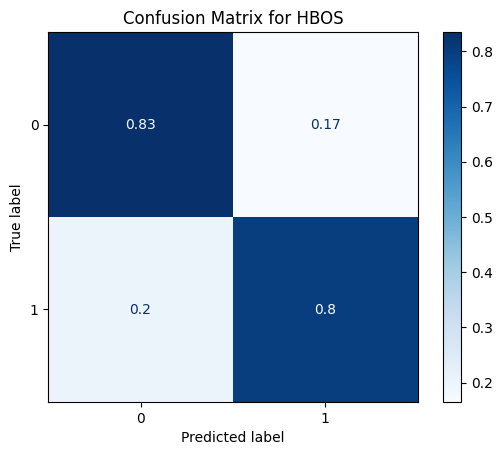

<Figure size 500x400 with 0 Axes>

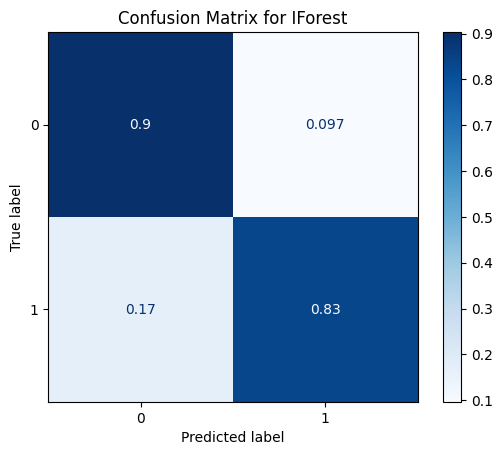

<Figure size 500x400 with 0 Axes>

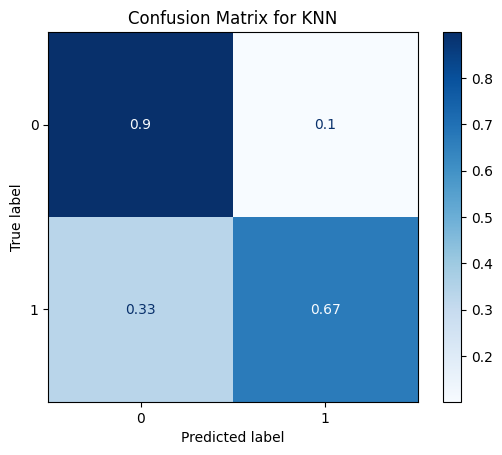

<Figure size 500x400 with 0 Axes>

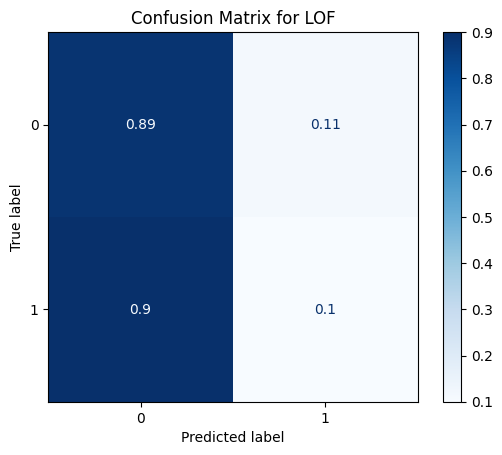

<Figure size 500x400 with 0 Axes>

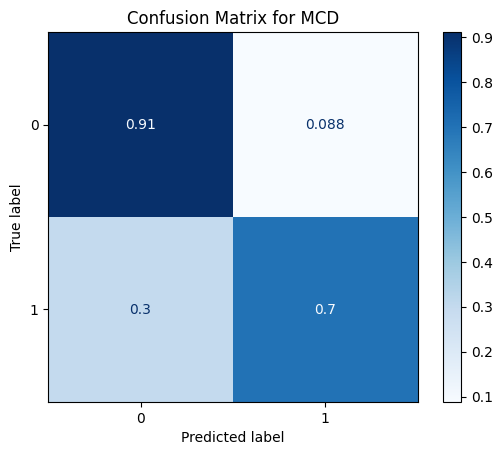

<Figure size 500x400 with 0 Axes>

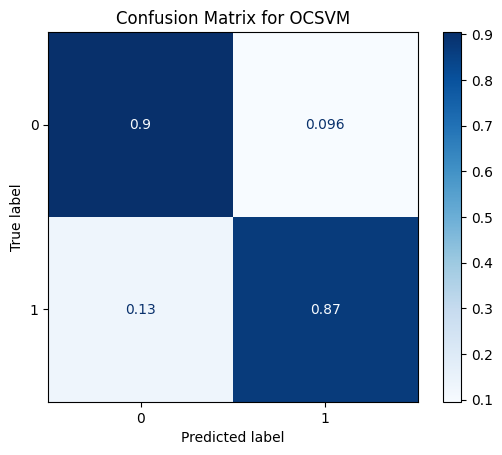

<Figure size 500x400 with 0 Axes>

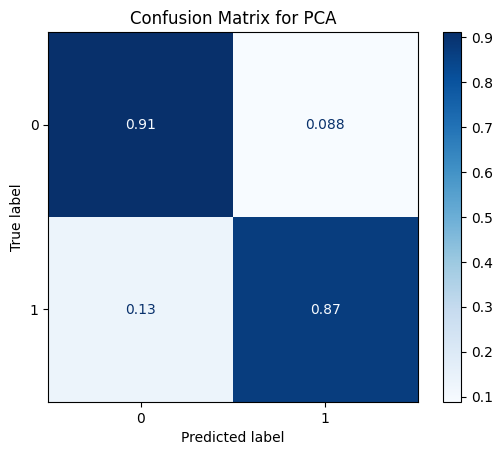

In [11]:
plot_metrics('predictions_0.1.csv', 'decision_scores_0.1.csv', 'y_test_0.1.csv', 0.1)

<Figure size 500x400 with 0 Axes>

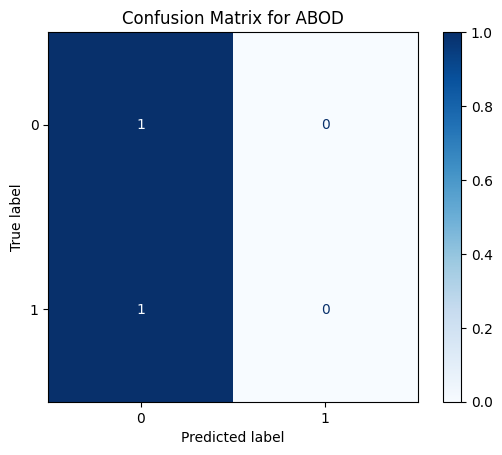

<Figure size 500x400 with 0 Axes>

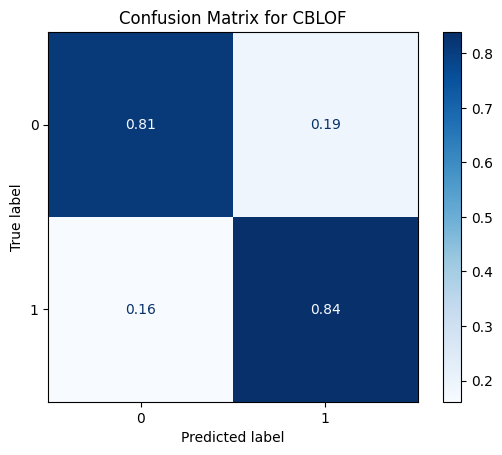

<Figure size 500x400 with 0 Axes>

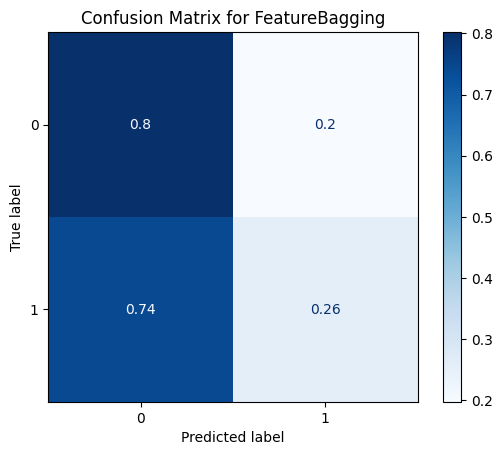

<Figure size 500x400 with 0 Axes>

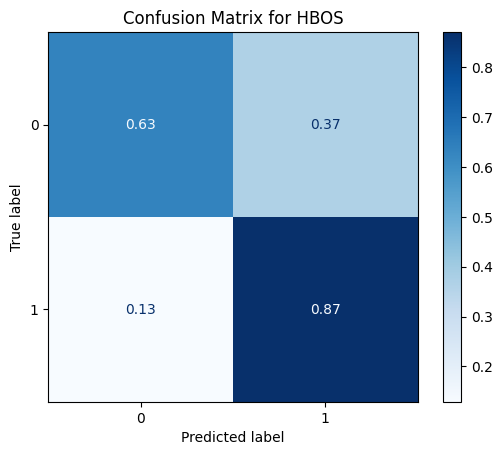

<Figure size 500x400 with 0 Axes>

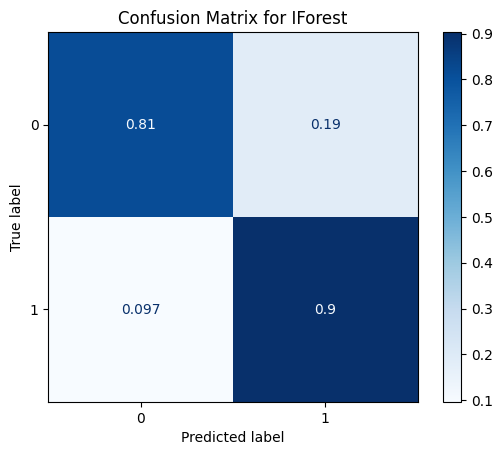

<Figure size 500x400 with 0 Axes>

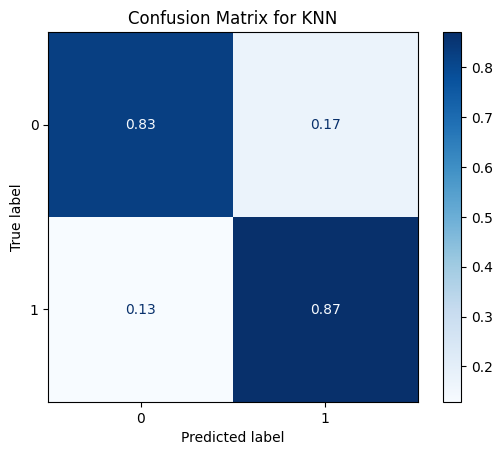

<Figure size 500x400 with 0 Axes>

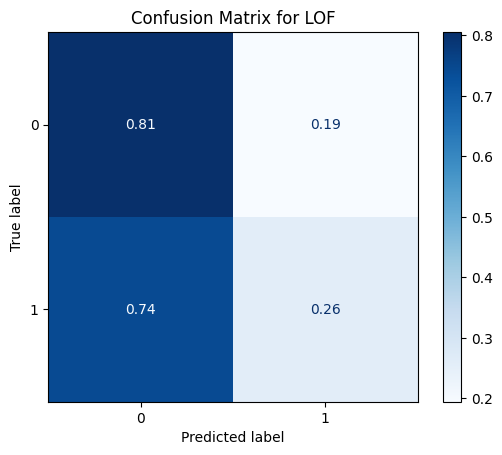

<Figure size 500x400 with 0 Axes>

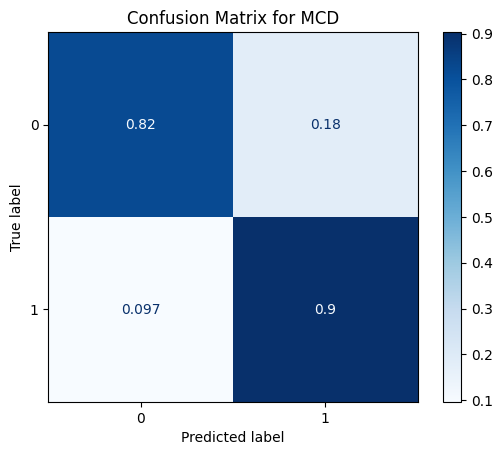

<Figure size 500x400 with 0 Axes>

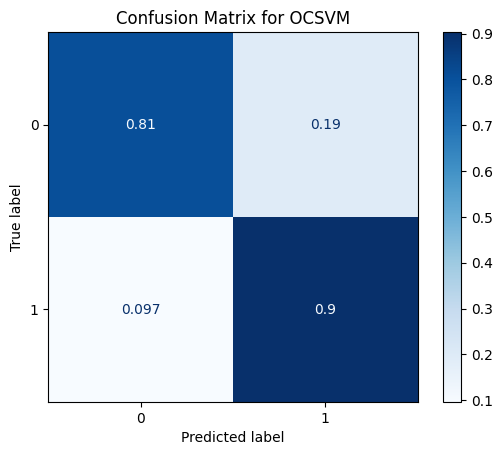

<Figure size 500x400 with 0 Axes>

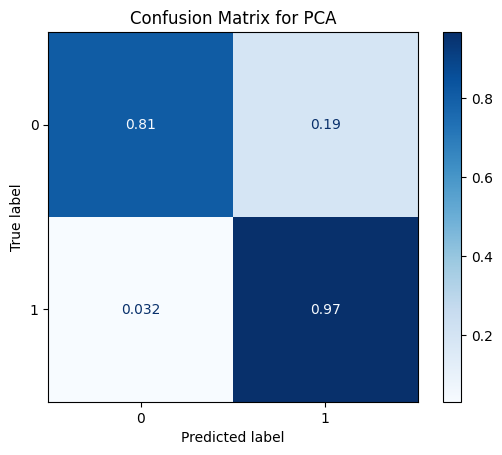

In [12]:
plot_metrics('predictions_0.2.csv', 'decision_scores_0.2.csv', 'y_test_0.2.csv', 0.2)

<Figure size 500x400 with 0 Axes>

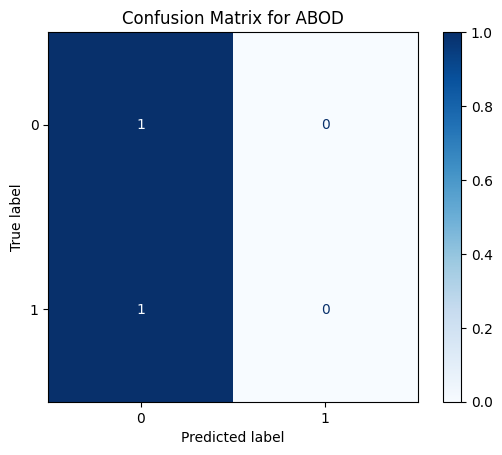

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

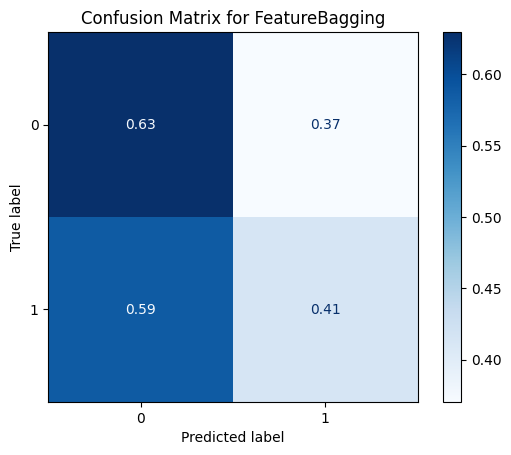

<Figure size 500x400 with 0 Axes>

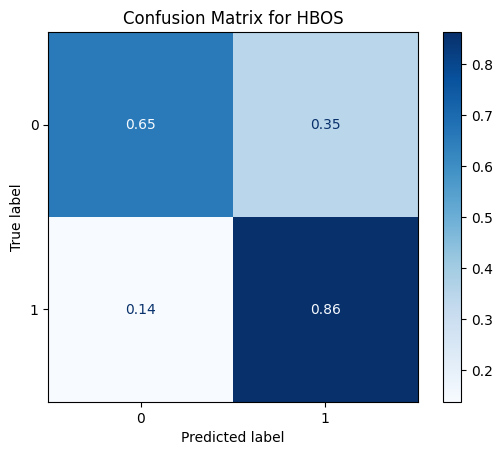

<Figure size 500x400 with 0 Axes>

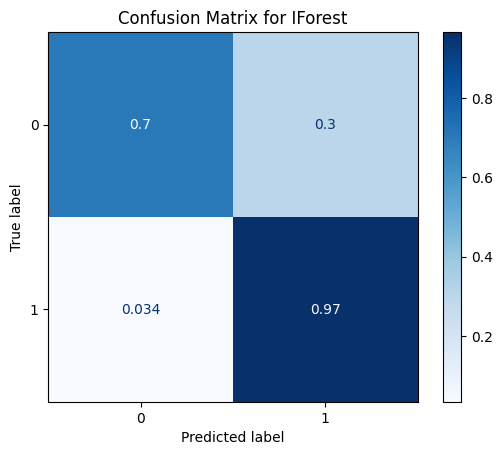

<Figure size 500x400 with 0 Axes>

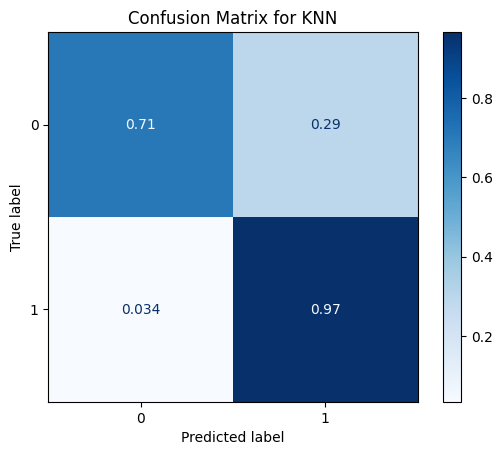

<Figure size 500x400 with 0 Axes>

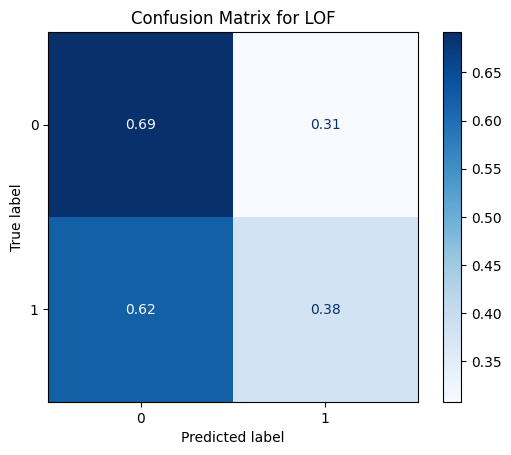

<Figure size 500x400 with 0 Axes>

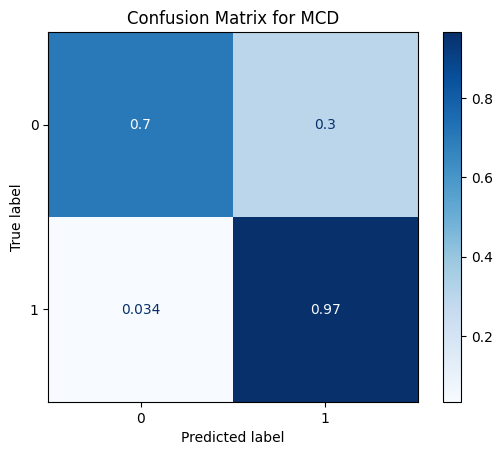

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

In [13]:
plot_metrics('predictions_0.3.csv', 'decision_scores_0.3.csv', 'y_test_0.3.csv', 0.3)

<Figure size 500x400 with 0 Axes>

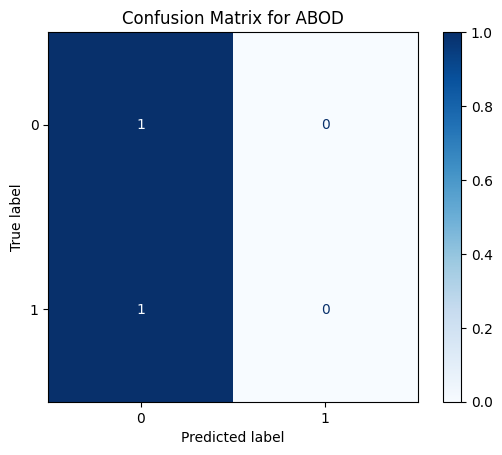

<Figure size 500x400 with 0 Axes>

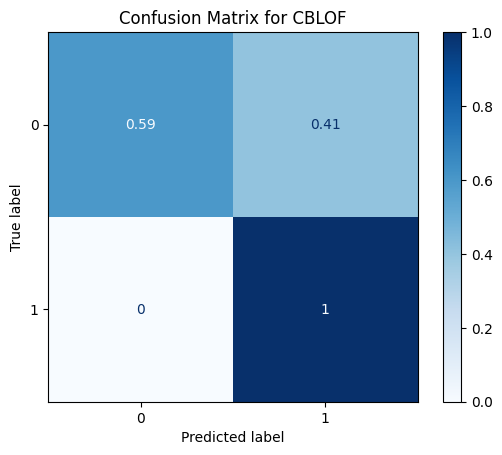

<Figure size 500x400 with 0 Axes>

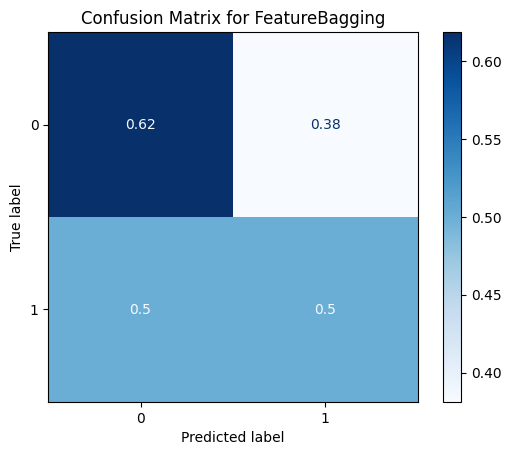

<Figure size 500x400 with 0 Axes>

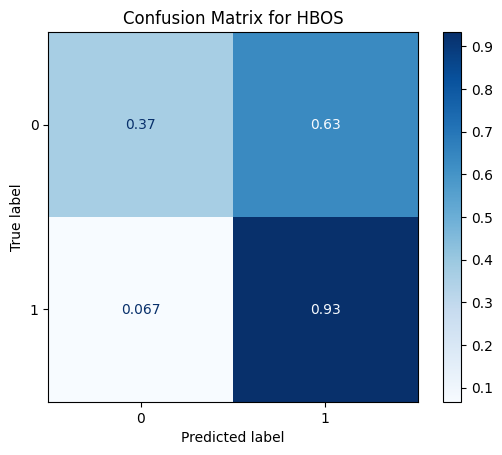

<Figure size 500x400 with 0 Axes>

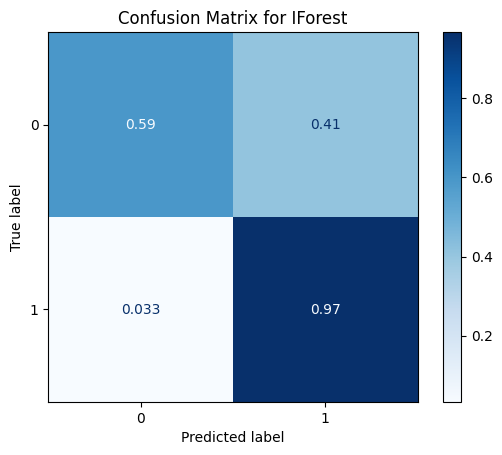

<Figure size 500x400 with 0 Axes>

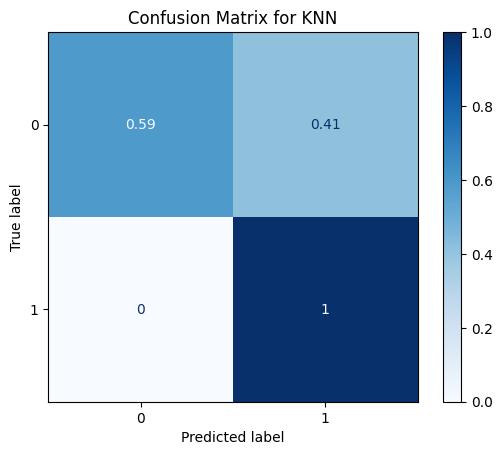

<Figure size 500x400 with 0 Axes>

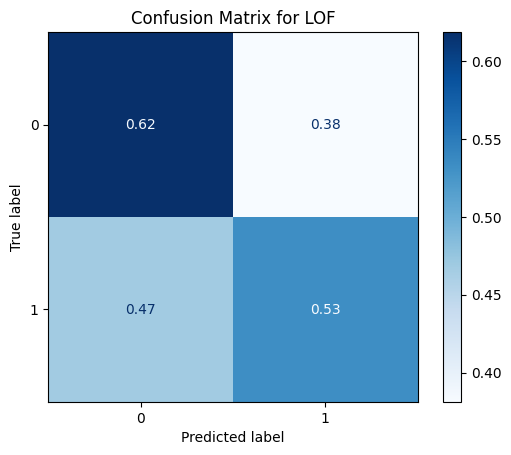

<Figure size 500x400 with 0 Axes>

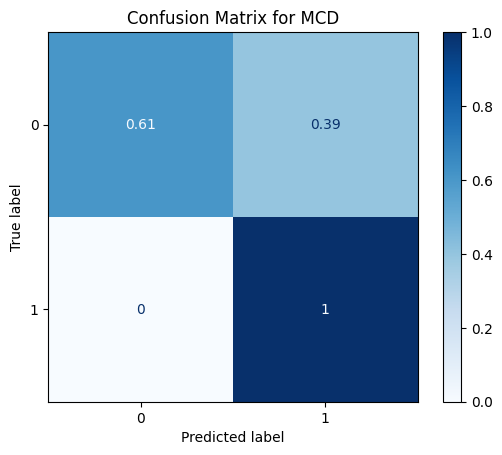

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

In [14]:
plot_metrics('predictions_0.4.csv', 'decision_scores_0.4.csv', 'y_test_0.4.csv', 0.4)

<Figure size 500x400 with 0 Axes>

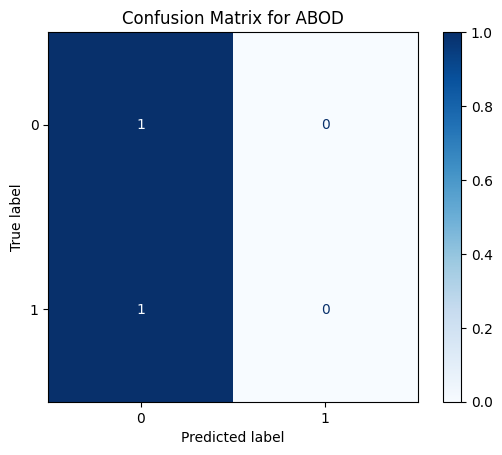

<Figure size 500x400 with 0 Axes>

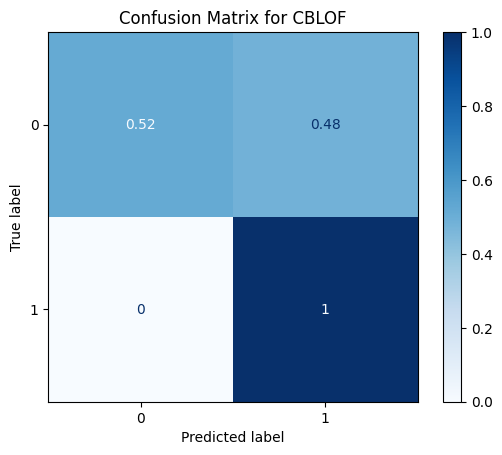

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

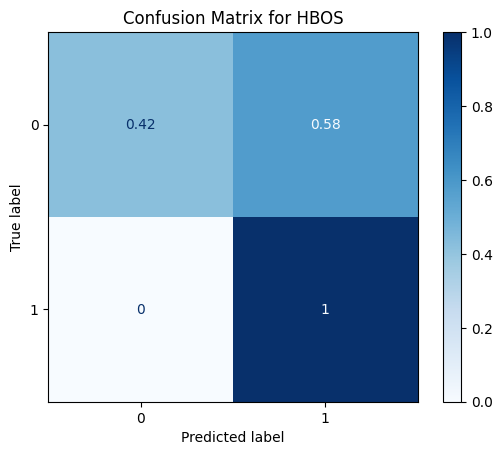

<Figure size 500x400 with 0 Axes>

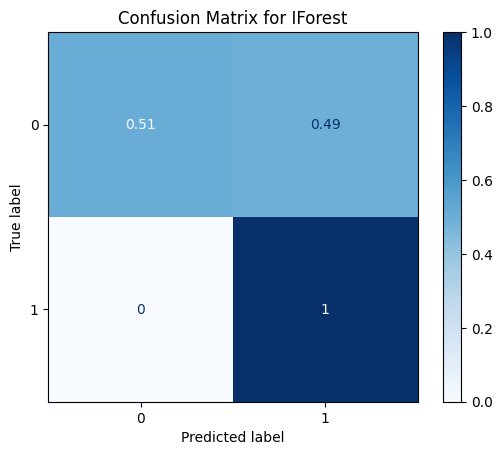

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

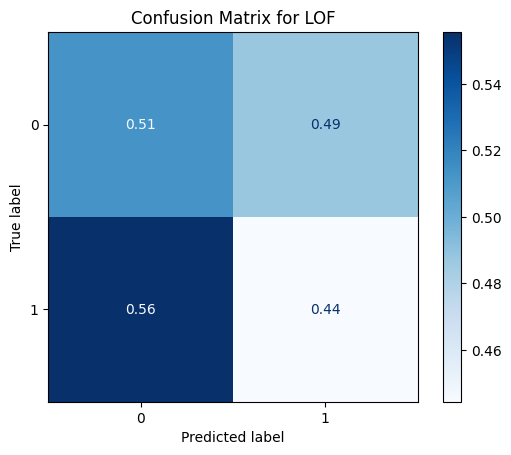

<Figure size 500x400 with 0 Axes>

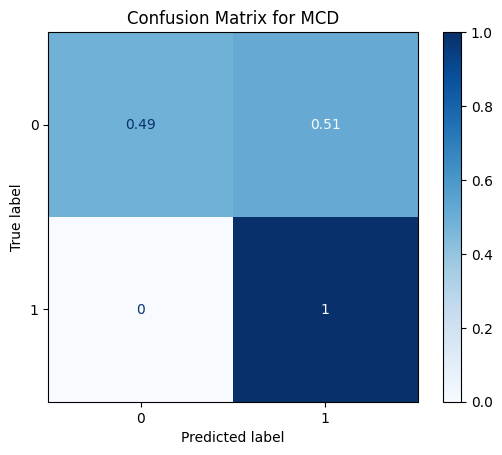

<Figure size 500x400 with 0 Axes>

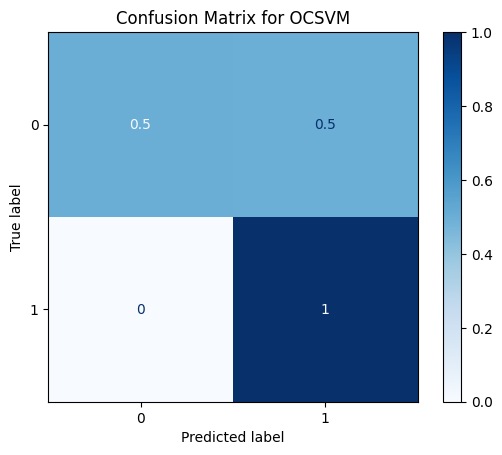

<Figure size 500x400 with 0 Axes>

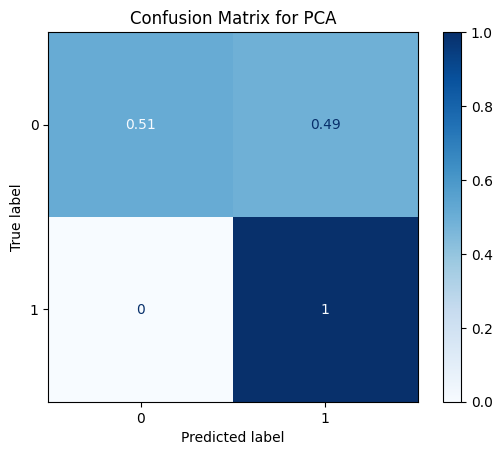

In [15]:
plot_metrics('predictions_0.5.csv', 'decision_scores_0.5.csv', 'y_test_0.5.csv', 0.5)

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np

def plot_all_roc_curves(pred_file, score_file, y_test_file):
    predictions_df = pd.read_csv(pred_file)
    decision_scores_df = pd.read_csv(score_file)
    y_test = pd.read_csv(y_test_file).to_numpy().ravel()

    # Define colors for different models
    colors = plt.cm.get_cmap('tab10', len(predictions_df.columns))  # Get a color map with 10 distinct colors

    plt.figure(figsize=(5, 4), dpi=600)  # Set the figure size

    # Iterate through each model's decision scores for ROC curve
    for idx, model_name in enumerate(predictions_df.columns):
        test_scores = decision_scores_df[model_name].to_numpy()

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, test_scores)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve for the current model with a different color
        plt.plot(fpr, tpr, color=colors(idx), lw=2, label=f'{model_name} (AUC = {roc_auc:.3f})')

    # Plot a diagonal line for reference
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # Set the axis limits and labels
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add a title and legend
    plt.title('ROC Curves for All Models')
    plt.legend(loc="lower right", prop={'size': 8})
    plt.show()


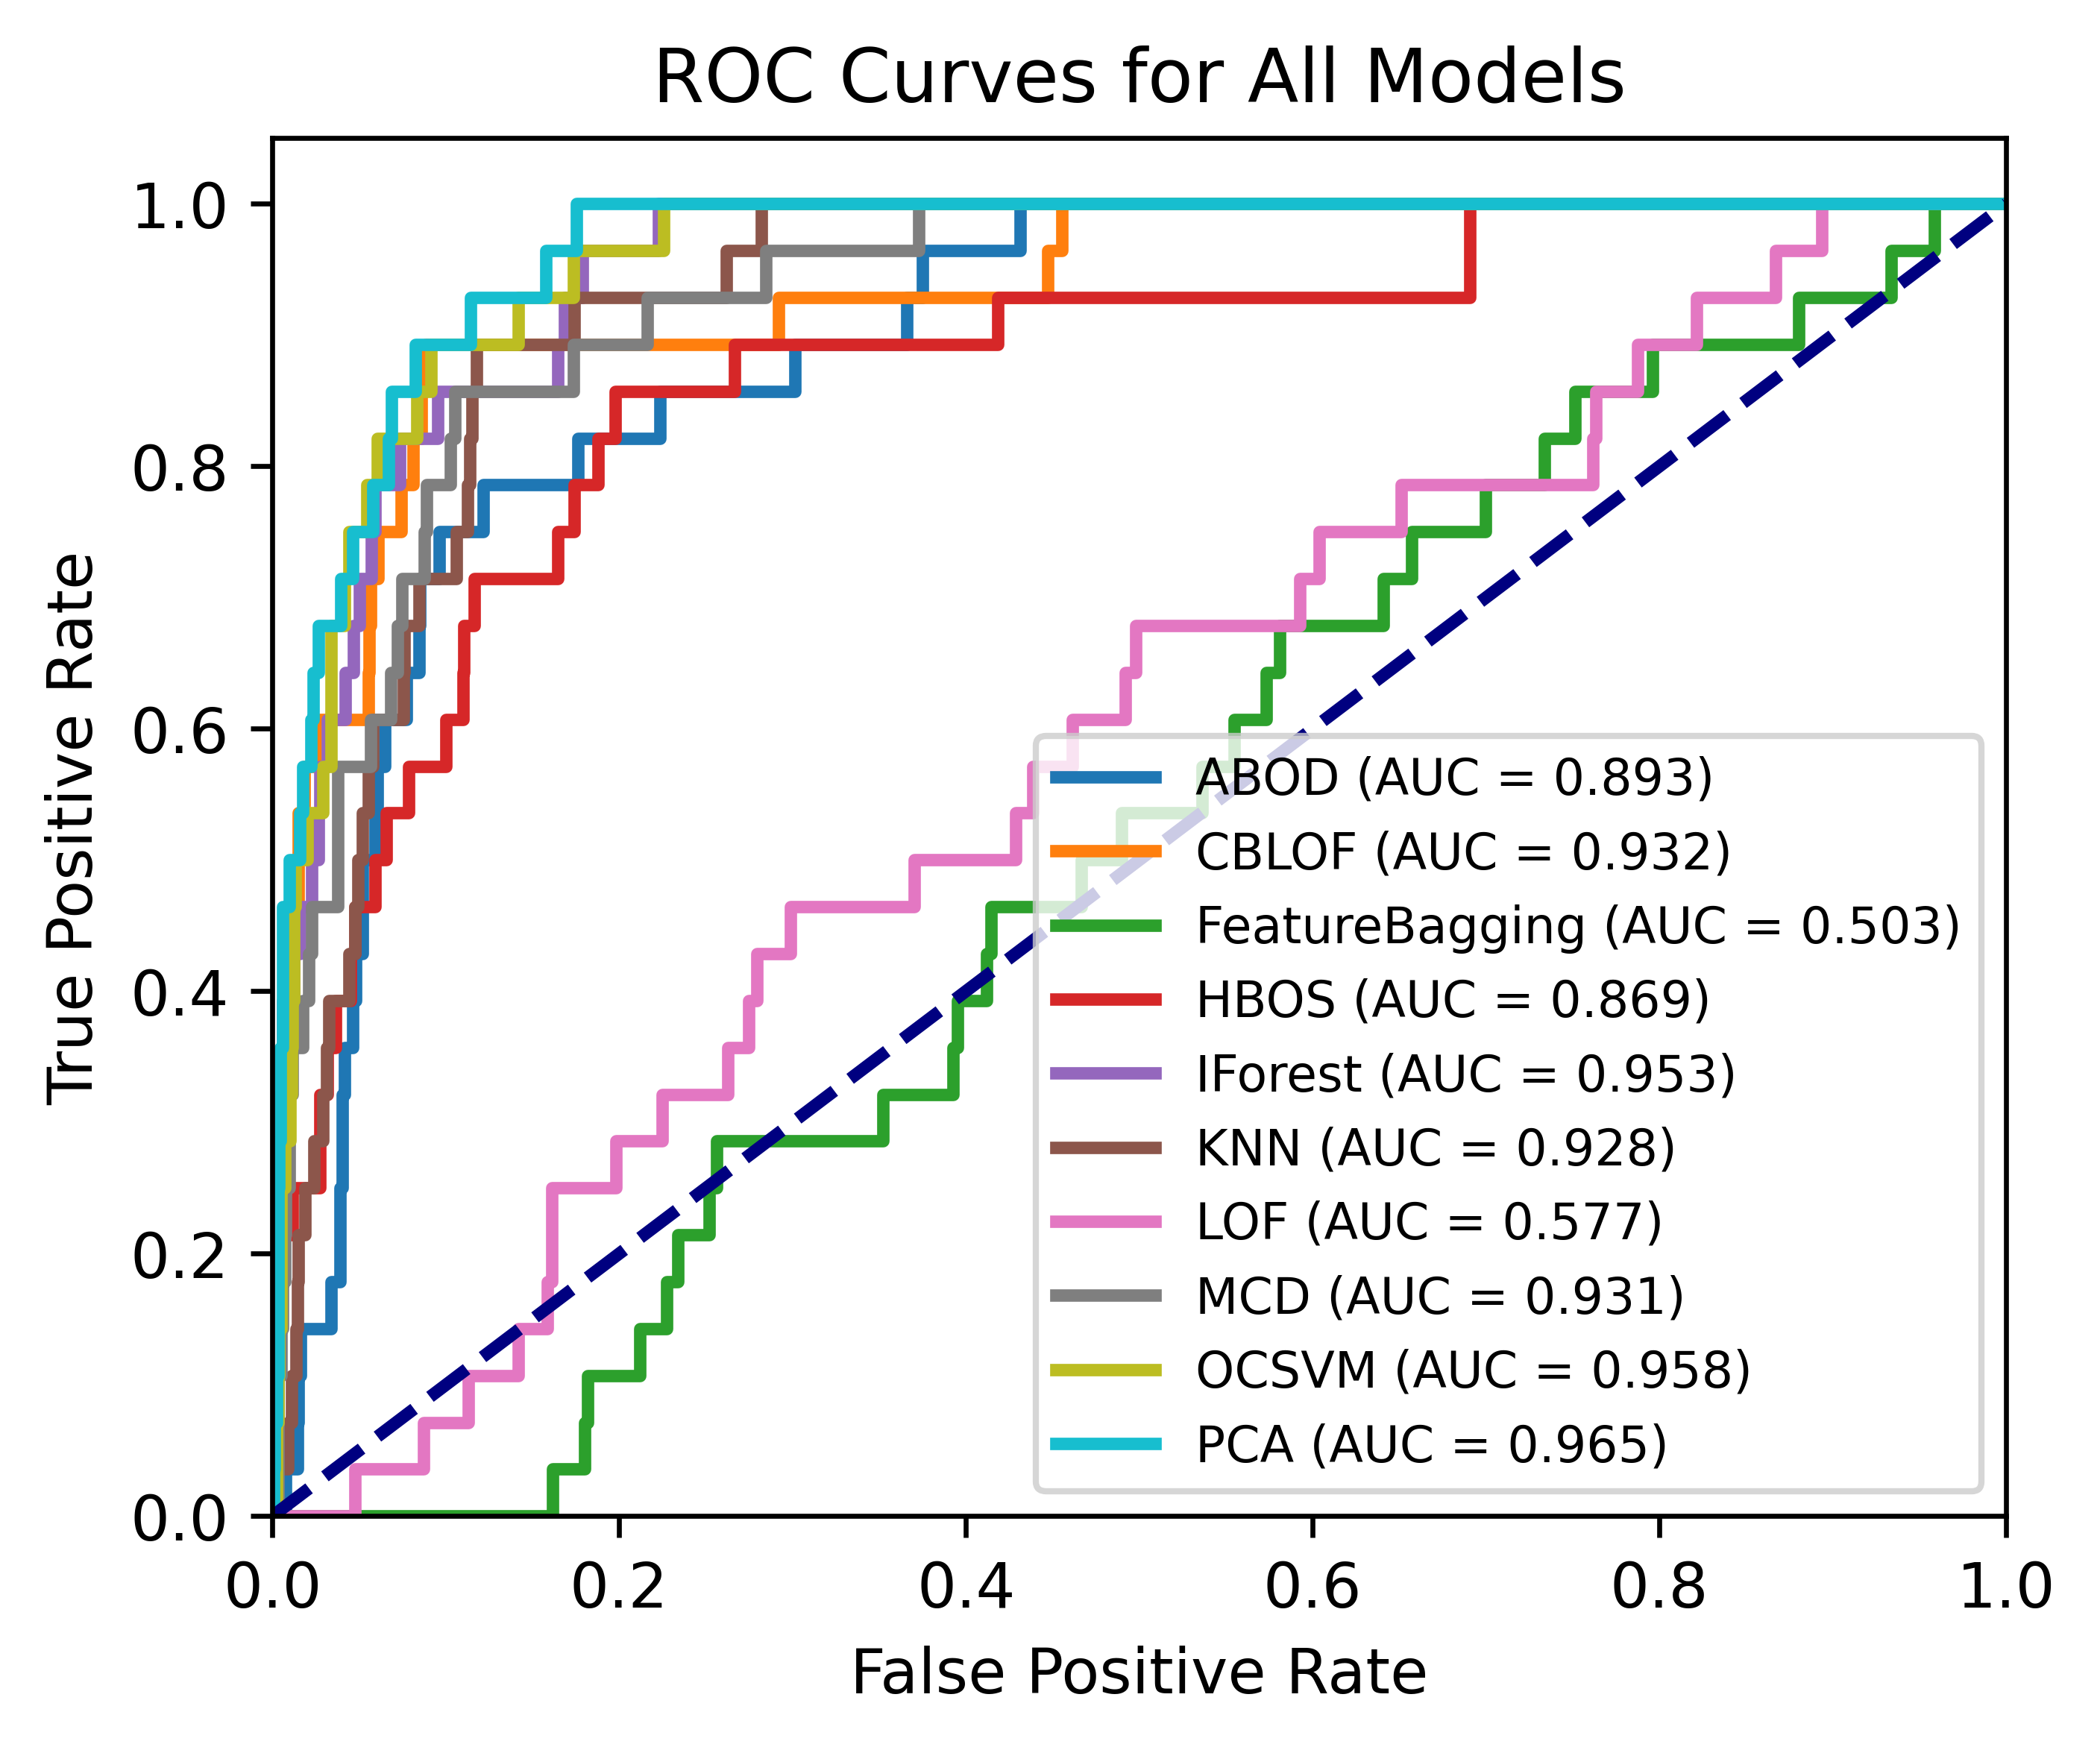

In [31]:
plot_all_roc_curves('predictions_0.05.csv', 'decision_scores_0.05.csv', 'y_test_0.05.csv')

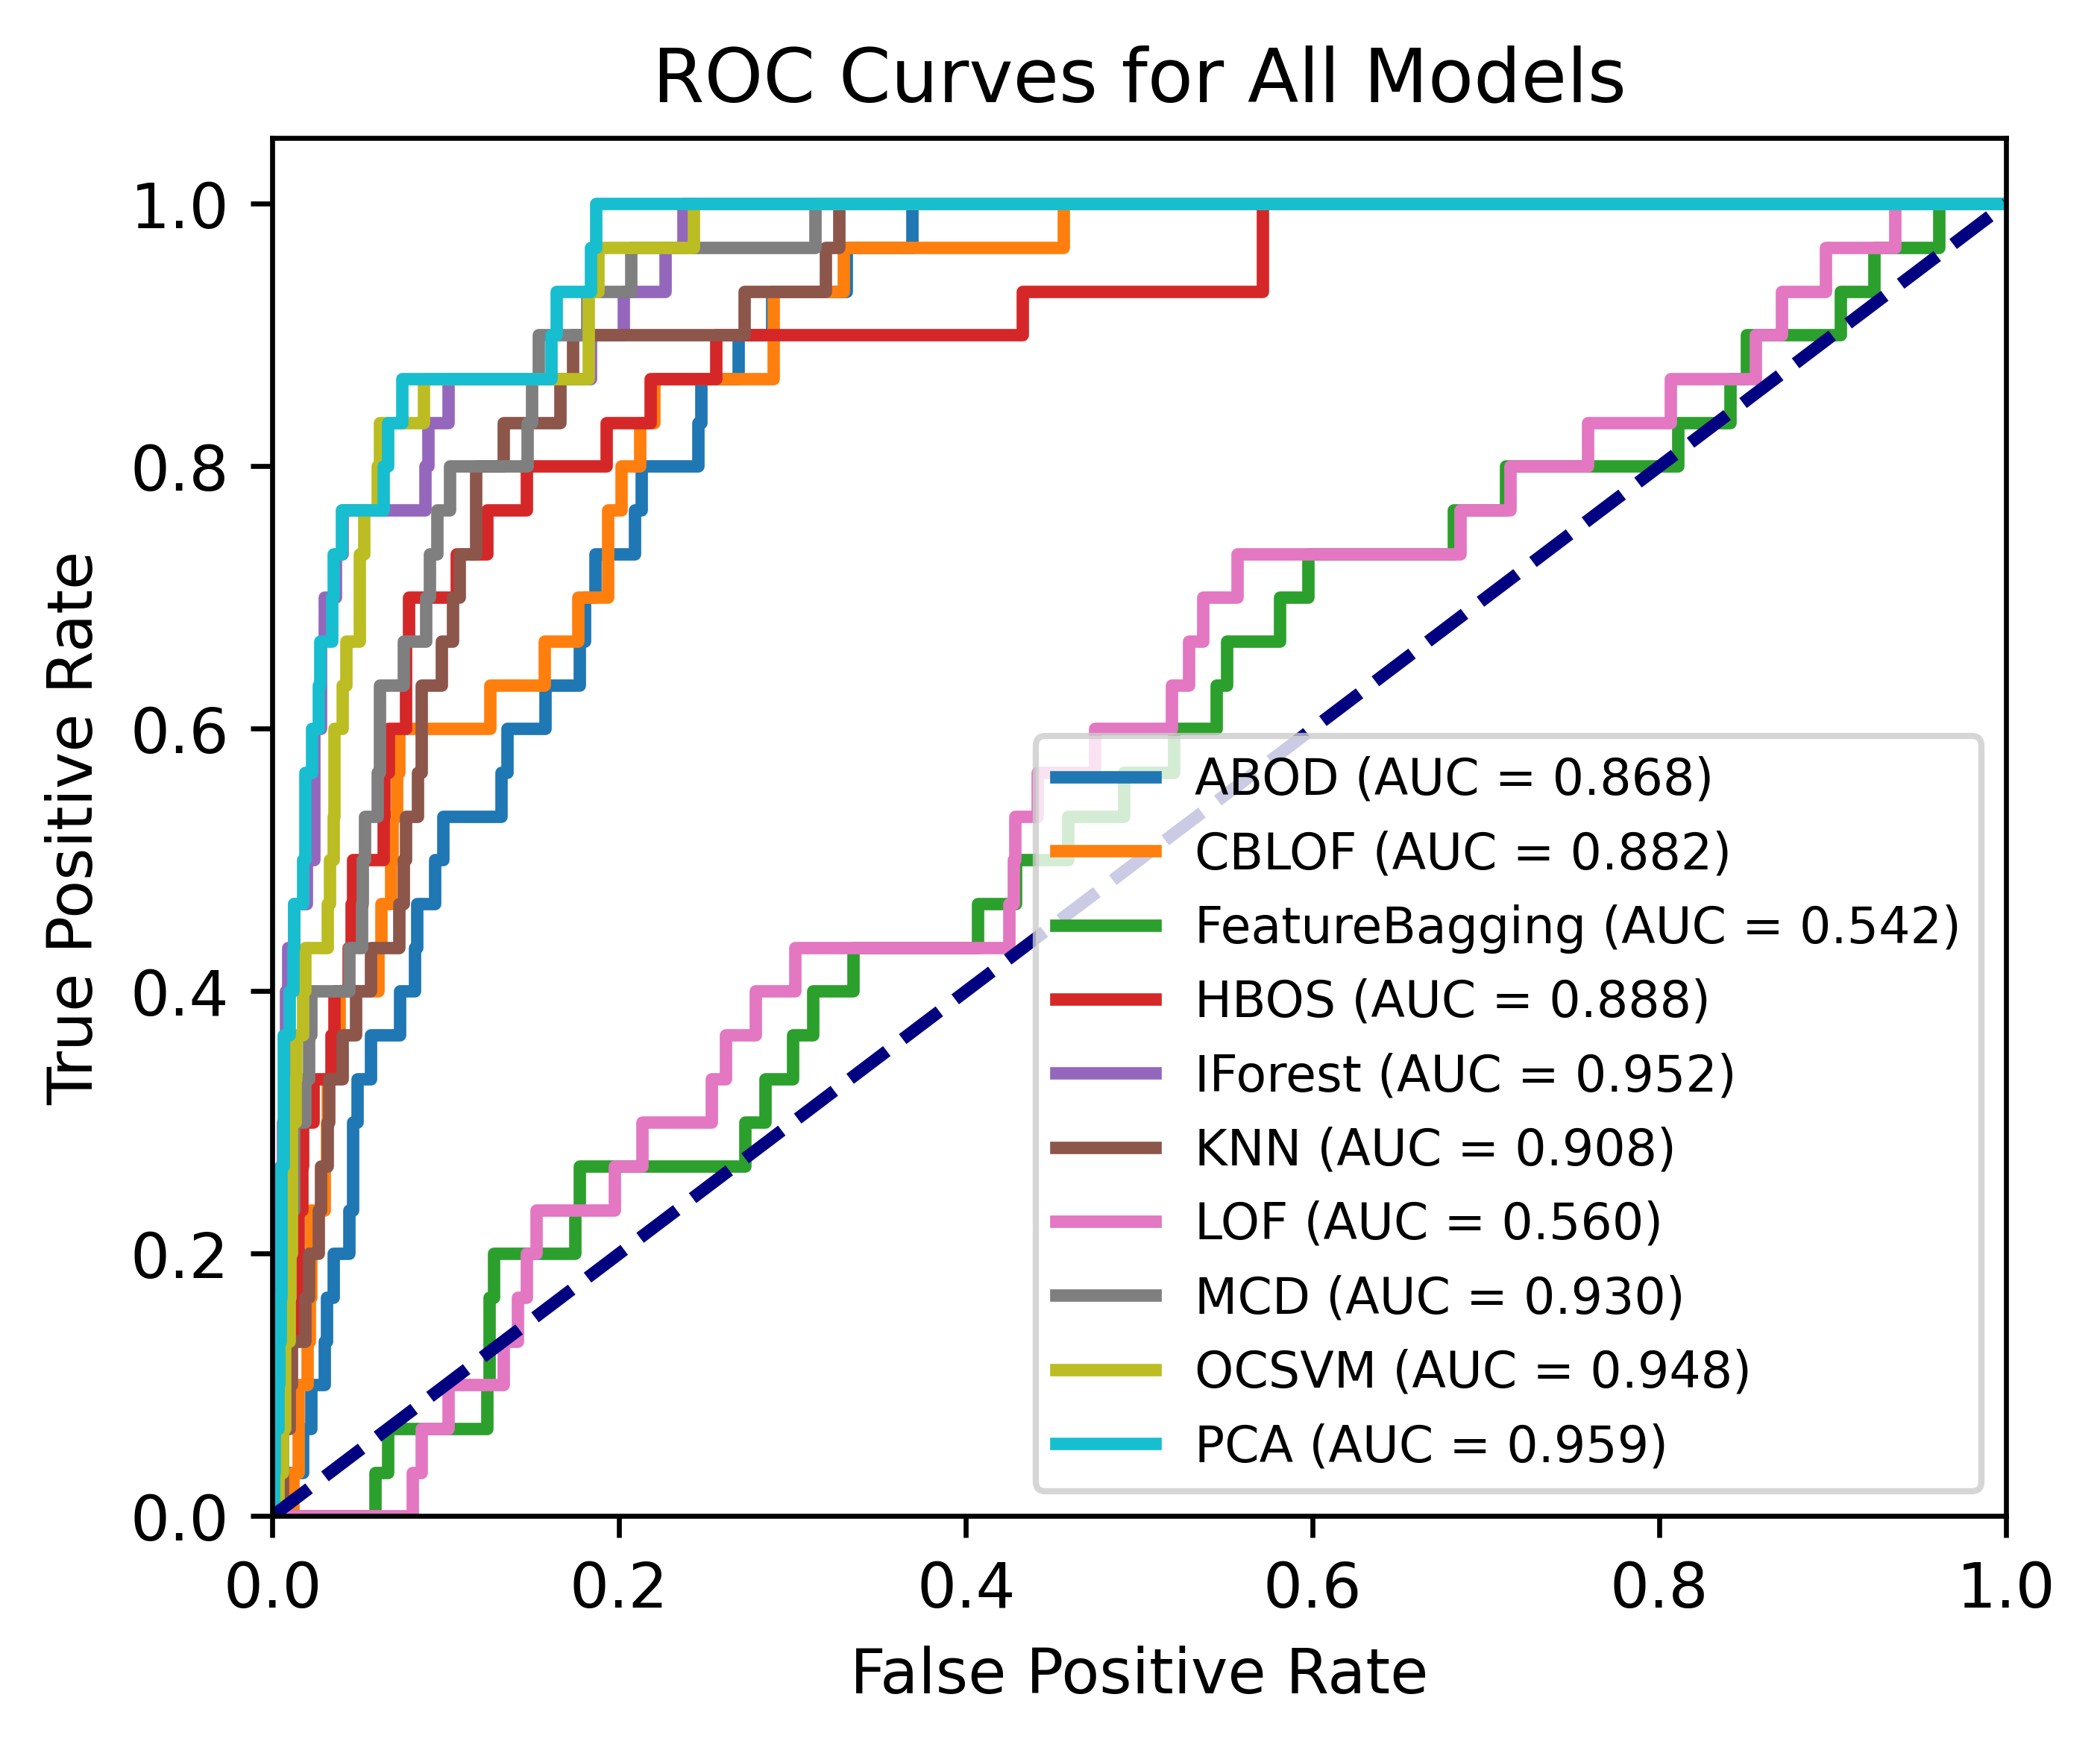

In [32]:
plot_all_roc_curves('predictions_0.1.csv', 'decision_scores_0.1.csv', 'y_test_0.1.csv')

In [33]:
plot_all_roc_curves('predictions_0.2.csv', 'decision_scores_0.2.csv', 'y_test_0.2.csv')

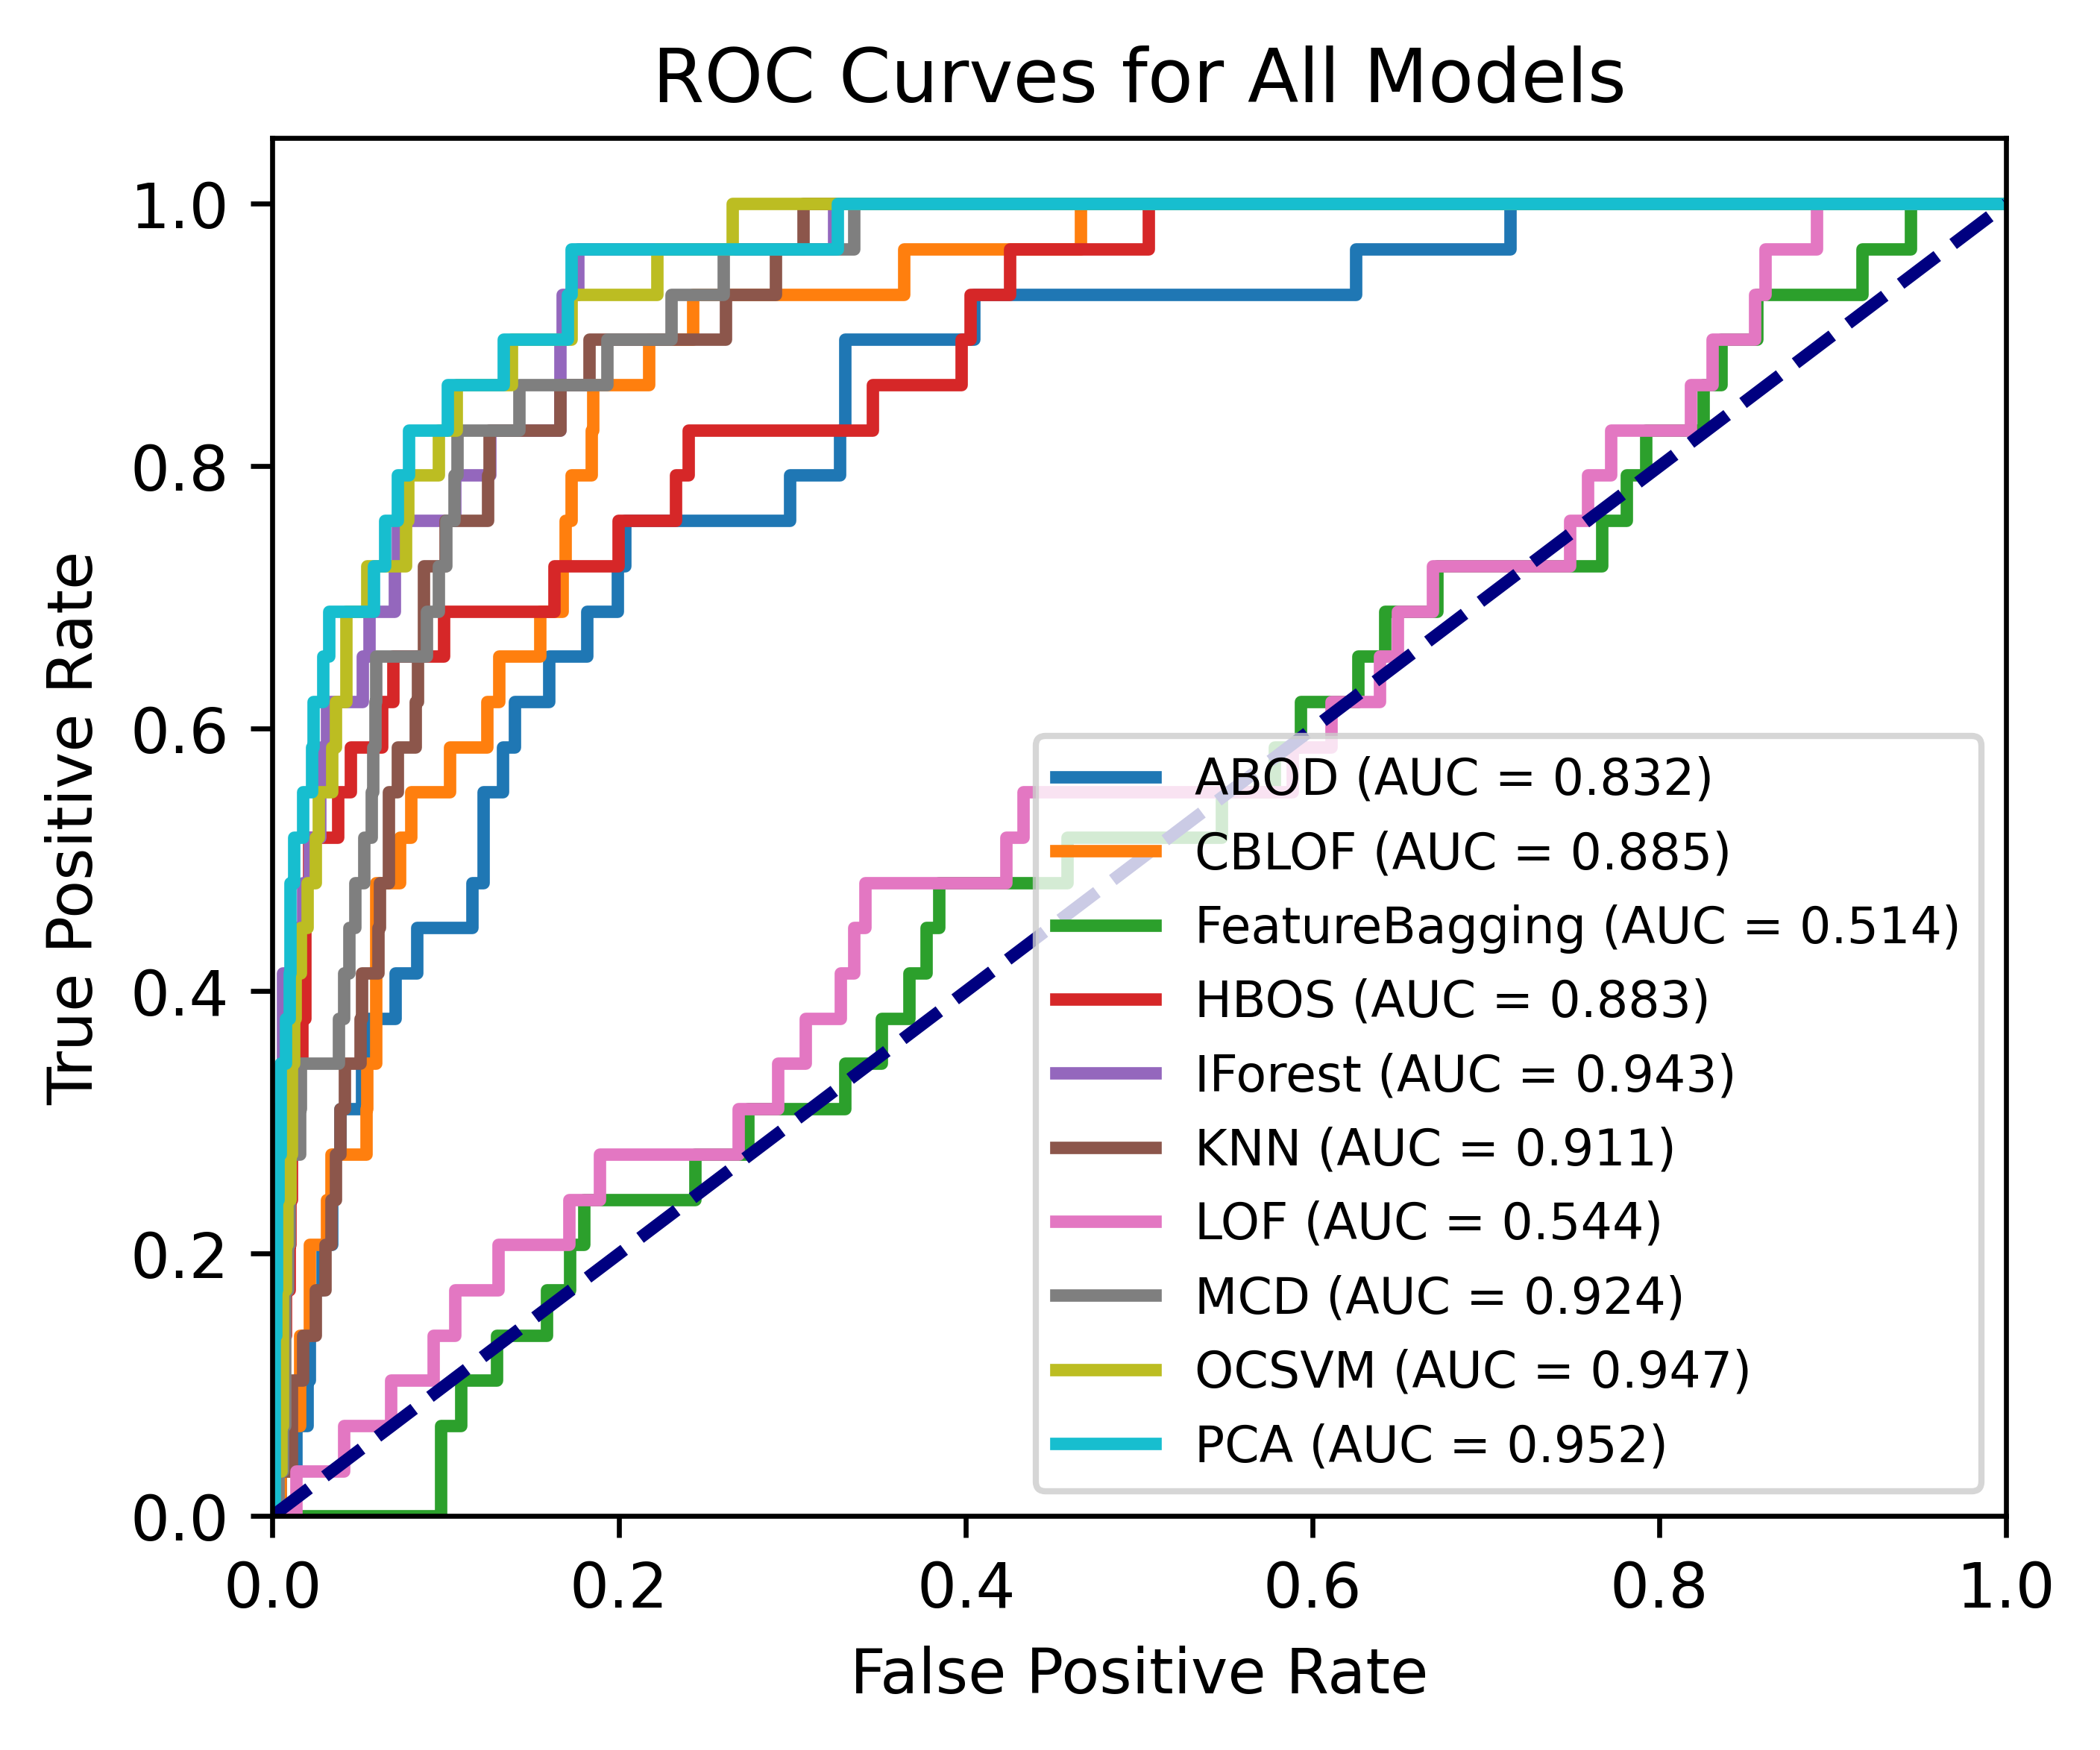

In [34]:
plot_all_roc_curves('predictions_0.3.csv', 'decision_scores_0.3.csv', 'y_test_0.3.csv')

In [35]:
plot_all_roc_curves('predictions_0.4.csv', 'decision_scores_0.4.csv', 'y_test_0.4.csv')

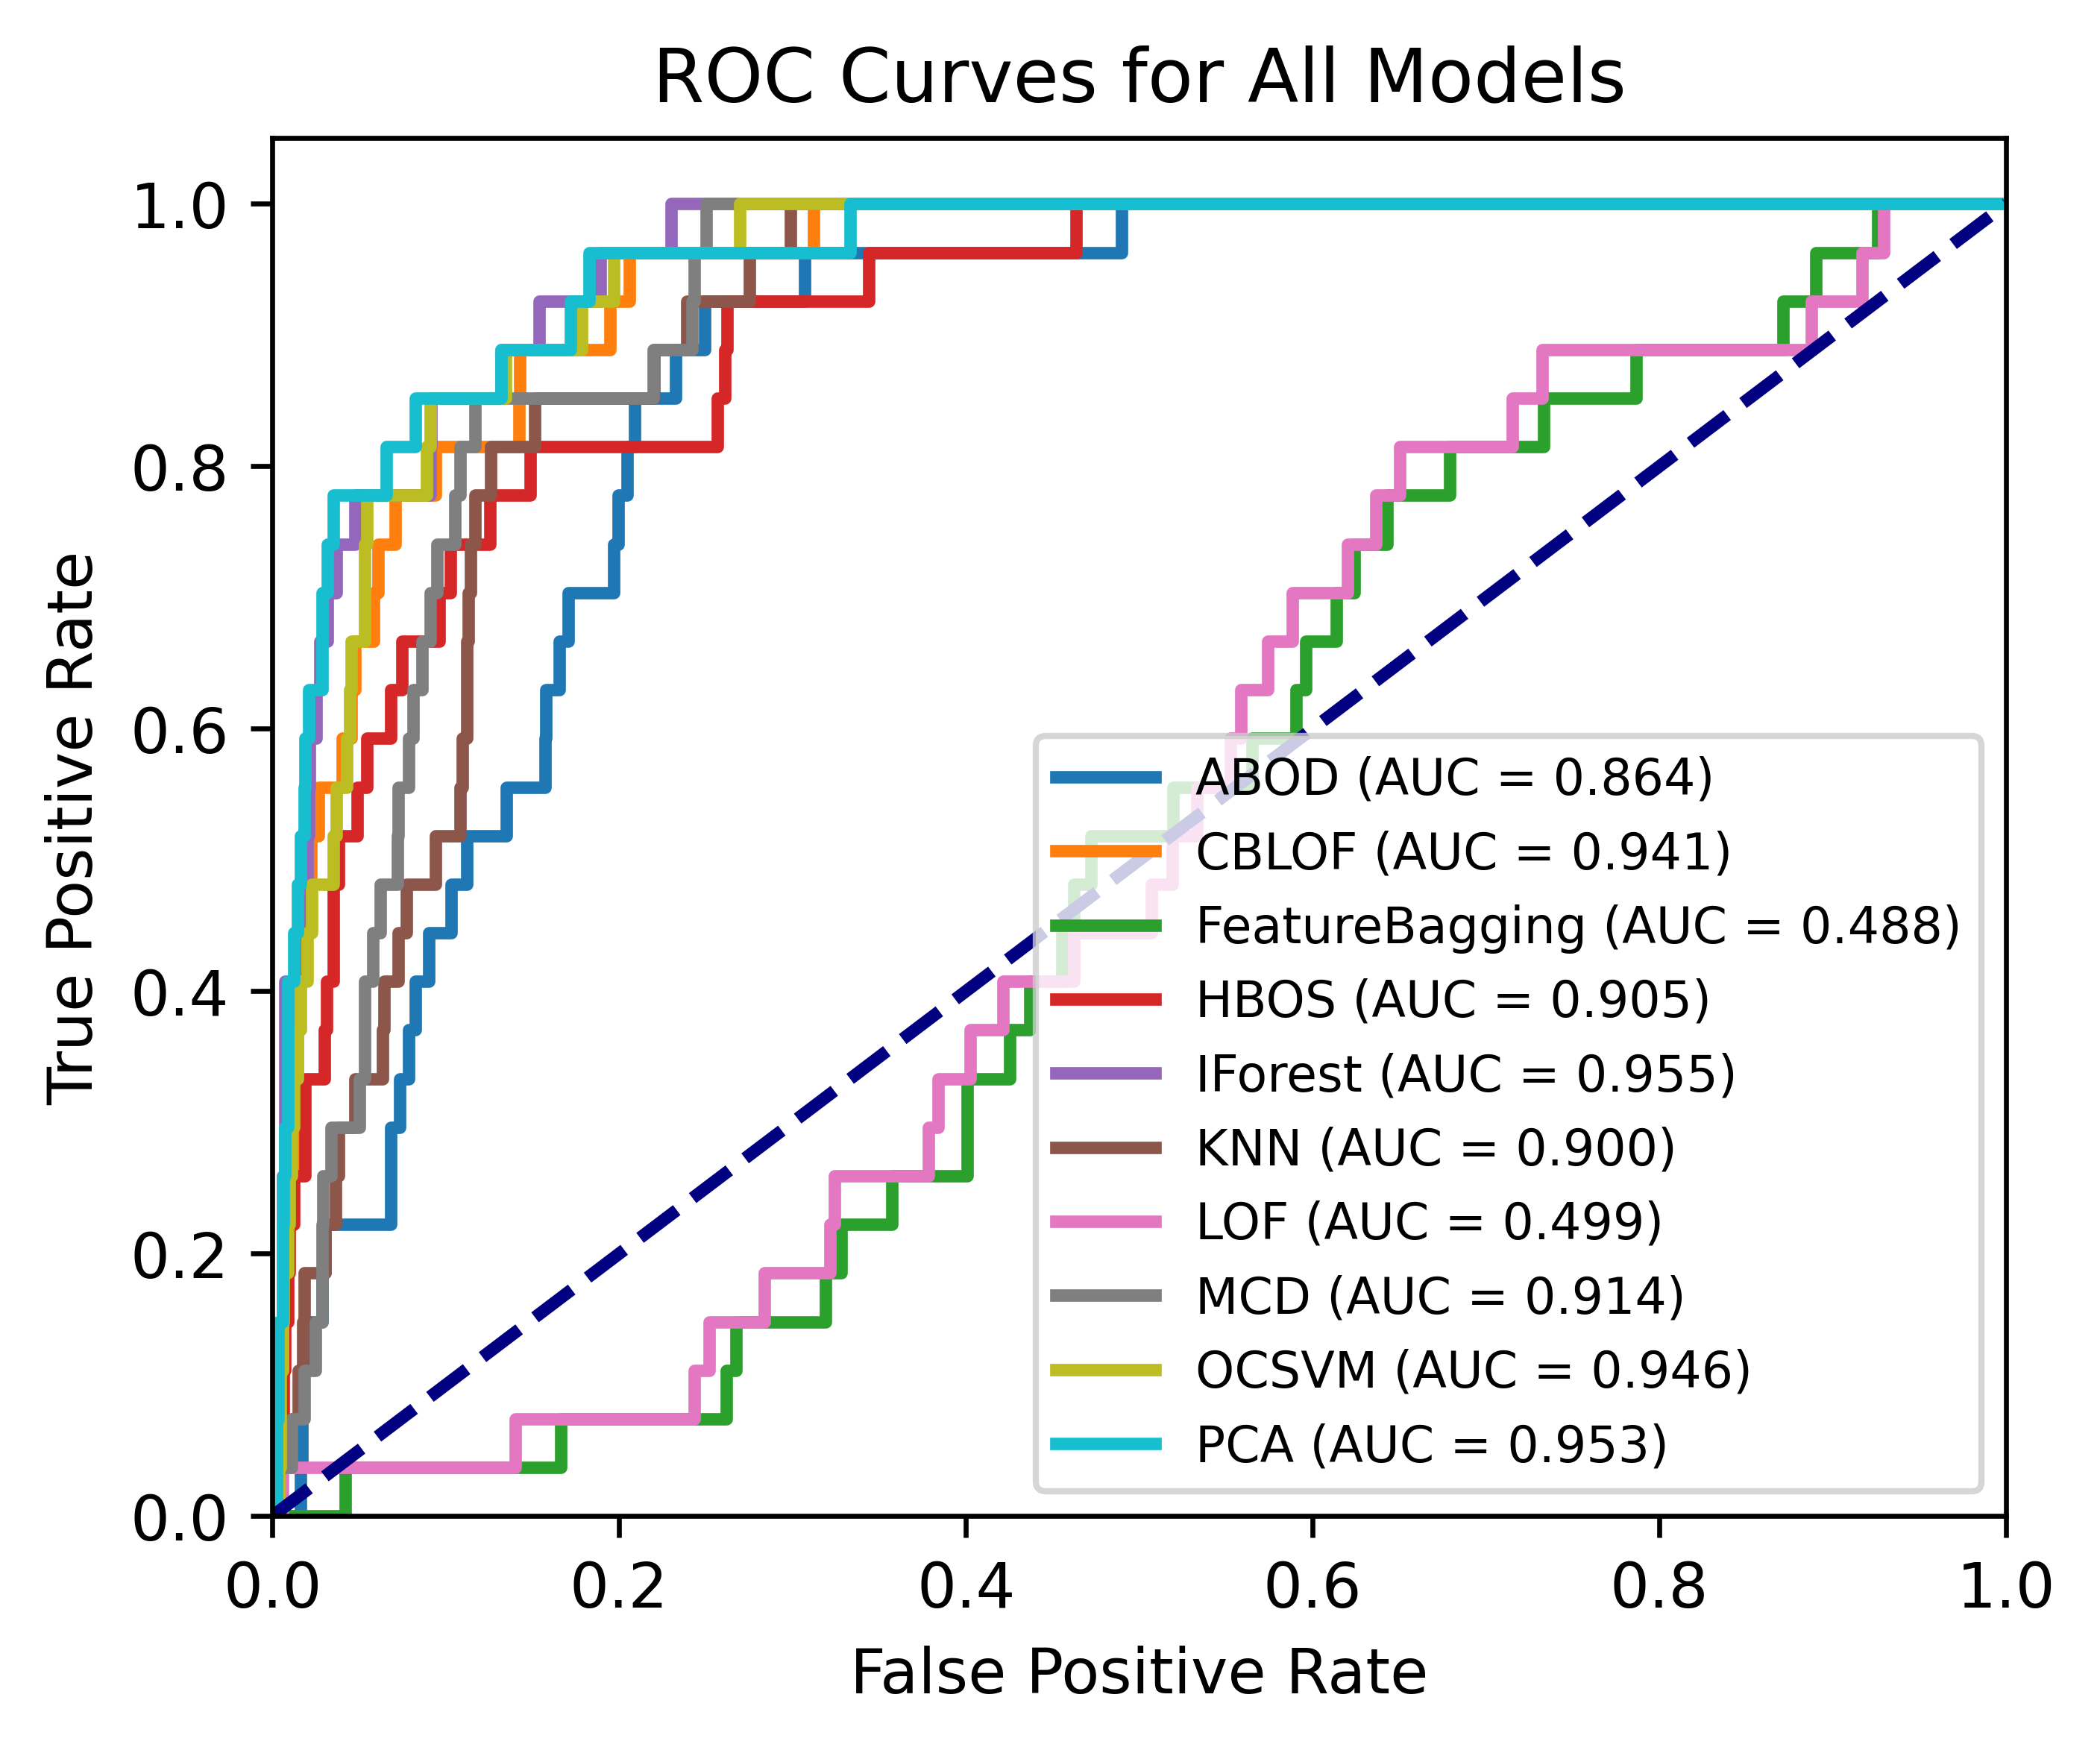

In [36]:
plot_all_roc_curves('predictions_0.5.csv', 'decision_scores_0.5.csv', 'y_test_0.5.csv')

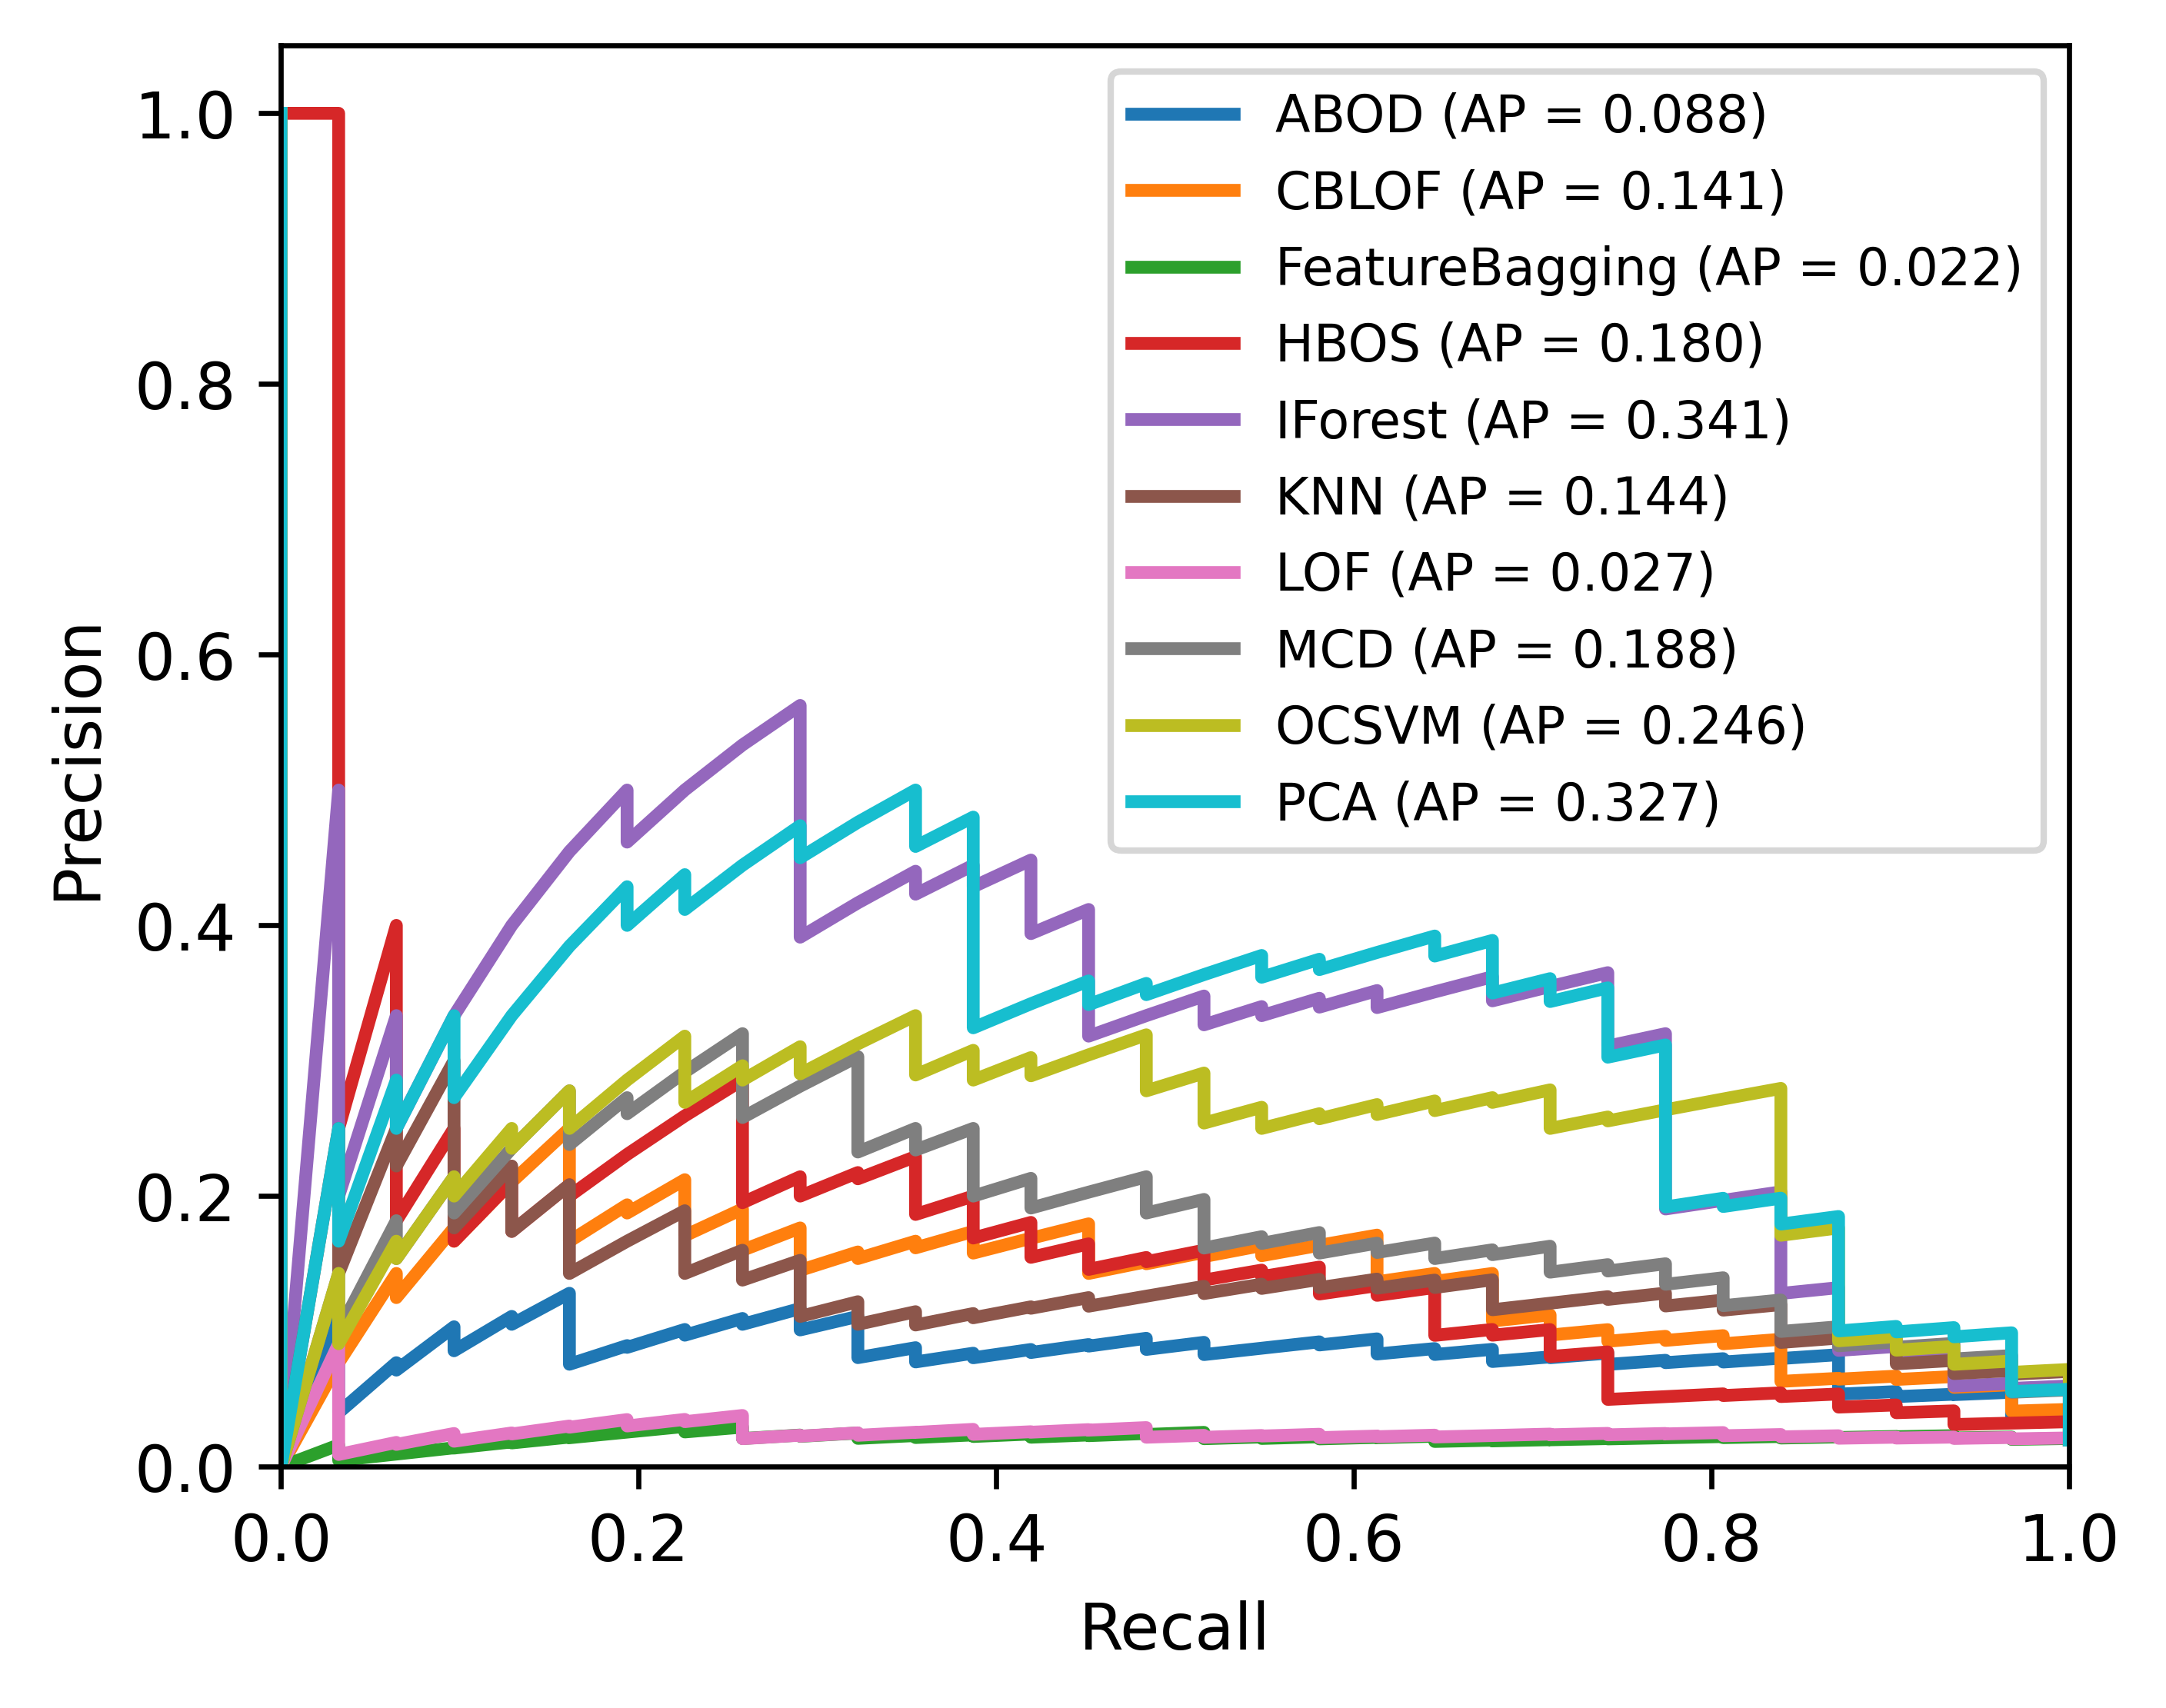

In [29]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_all_aucpr_curves(pred_file, score_file, y_test_file):
    predictions_df = pd.read_csv(pred_file)
    decision_scores_df = pd.read_csv(score_file)
    y_test = pd.read_csv(y_test_file).to_numpy().ravel()

    # Define colors for different models
    colors = plt.cm.get_cmap('tab10', len(predictions_df.columns))  # Get a color map with 10 distinct colors

    plt.figure(figsize=(5, 4), dpi=600)  # Set the figure size

    # Iterate through each model's decision scores for PR curve
    for idx, model_name in enumerate(predictions_df.columns):
        test_scores = decision_scores_df[model_name].to_numpy()

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_test, test_scores)
        aucpr = average_precision_score(y_test, test_scores)

        # Plot AUC-PR curve for the current model with a different color
        plt.plot(recall, precision, color=colors(idx), lw=2, label=f'{model_name} (AP = {aucpr:.3f})')

    # Set the axis limits and labels
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')

    # Add a title and legend

    plt.legend(loc="upper right", prop={'size': 8})
    plt.show()

plot_all_aucpr_curves('predictions_0.2.csv', 'decision_scores_0.2.csv', 'y_test_0.2.csv')